# 

# Task 1. Time-series prediction with neural networks

## Task 1.1 Prediction with synthetic series using MLP, RNN, and LSTM

### model1

In [23]:
import numpy as np


step = 0.005
series_1 = np.arange(0, 1, step)


In [4]:
def data_split(series, input_size, output_size,train_ratio):
    input = []
    output = []
    for i in range(len(series) - input_size - output_size + 1):
        input.append(series[i:i+input_size])
        output.append(series[i+input_size:i+input_size+output_size])
    input = np.array(input)
    output = np.array(output)
    train_size = int(train_ratio * len(input))
    input_train, input_test = input[:train_size], input[train_size:]
    output_train, output_test = output[:train_size], output[train_size:]
    return input_train, input_test, output_train, output_test

#print(input,output)

In [78]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

input_size = 4
output_size = 1
#split data into training and testing sets
train_ratio = 0.8

input_train, input_test, output_train, output_test = data_split(series_1, input_size,output_size, train_ratio)
# Create and train the MLP model
model_1_1 = Sequential()
model_1_1.add(Dense(10, input_dim=input_size, activation='tanh'))
model_1_1.add(Dense(output_size, activation='linear'))

model_1_1.compile(loss='mean_squared_error', optimizer='adam')
model_1_1.fit(input_train, output_train, epochs=100, batch_size=32)

prediction_1 = model_1_1.predict(input_test)



Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 9.2269e-04
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 8.6576e-04
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 8.3989e-04
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 8.2962e-04
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 8.1029e-04
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 8.1364e-04
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 7.8674e-04
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 7.5797e-04
Epoch 13/100
5/5 [===========

[[0.8  ]
 [0.805]
 [0.81 ]
 [0.815]
 [0.82 ]
 [0.825]
 [0.83 ]
 [0.835]
 [0.84 ]
 [0.845]
 [0.85 ]
 [0.855]
 [0.86 ]
 [0.865]
 [0.87 ]
 [0.875]
 [0.88 ]
 [0.885]
 [0.89 ]
 [0.895]
 [0.9  ]
 [0.905]
 [0.91 ]
 [0.915]
 [0.92 ]
 [0.925]
 [0.93 ]
 [0.935]
 [0.94 ]
 [0.945]
 [0.95 ]
 [0.955]
 [0.96 ]
 [0.965]
 [0.97 ]
 [0.975]
 [0.98 ]
 [0.985]
 [0.99 ]
 [0.995]] [[0.7722301 ]
 [0.77607113]
 [0.77989435]
 [0.7836996 ]
 [0.78748673]
 [0.7912561 ]
 [0.7950074 ]
 [0.79874074]
 [0.80245614]
 [0.8061535 ]
 [0.80983275]
 [0.813494  ]
 [0.81713736]
 [0.8207626 ]
 [0.82436985]
 [0.8279589 ]
 [0.8315299 ]
 [0.835083  ]
 [0.838618  ]
 [0.84213495]
 [0.84563404]
 [0.8491149 ]
 [0.85257787]
 [0.8560227 ]
 [0.8594495 ]
 [0.8628584 ]
 [0.86624926]
 [0.86962223]
 [0.87297714]
 [0.8763141 ]
 [0.87963307]
 [0.8829341 ]
 [0.8862175 ]
 [0.88948256]
 [0.89272994]
 [0.89595956]
 [0.8991712 ]
 [0.90236527]
 [0.90554136]
 [0.9086997 ]]


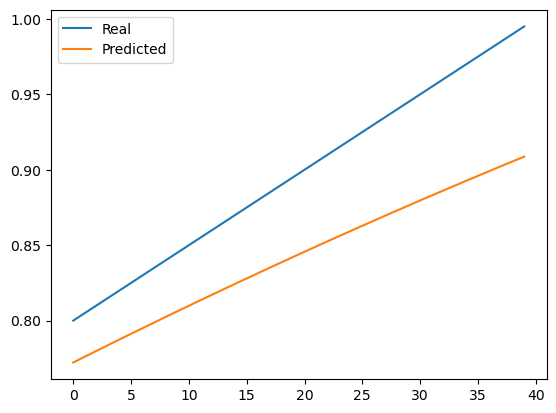

In [79]:
print(output_test, prediction_1)

plt.plot(output_test,label='Real')
plt.plot(prediction_1, label='Predicted')
plt.legend()
plt.show()

### 2

In [202]:
noise = np.random.normal(0, np.sqrt(0.001), 200)
print(noise.max())
series_2=series_1+noise
in_train, in_test, out_train, out_test = data_split(series_2,input_size,output_size,train_ratio)
model_1_2 = Sequential()
model_1_2.add(Dense(10, input_dim=input_size, activation='relu'))
model_1_2.add(Dense(output_size, activation='linear'))
model_1_2.compile(loss='mean_squared_error', optimizer='adam')

model_1_2.fit(in_train,out_train,epochs=100,batch_size=30)

prediction_2=model_1_2.predict(in_test)


0.09982626862897805
Epoch 1/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0915
Epoch 2/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0649
Epoch 3/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0434
Epoch 4/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 5/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 9/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 10/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 11/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 12/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 13/1000
6/6 [==========

0.03469137173337501


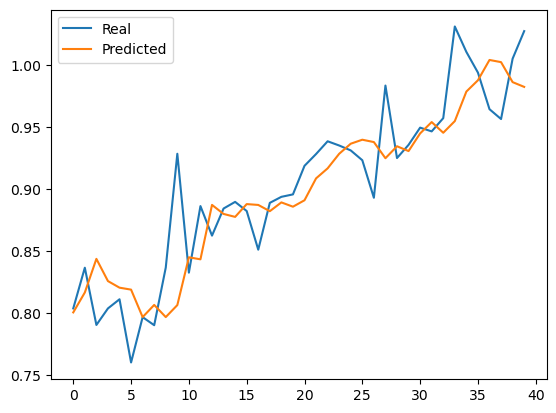

In [203]:
#print(out_test, prediction_2)
std_1_2=(out_test-prediction_2).std()
print(std_1_2)
plt.plot(out_test,label='Real')
plt.plot(prediction_2, label='Predicted')
plt.legend()
plt.show()

### 3.

[ 0.01570732  0.01884844  0.02198938 ... -0.00942464 -0.00628314
 -0.00314159]
38/38 [==============================] - 0s 1ms/step


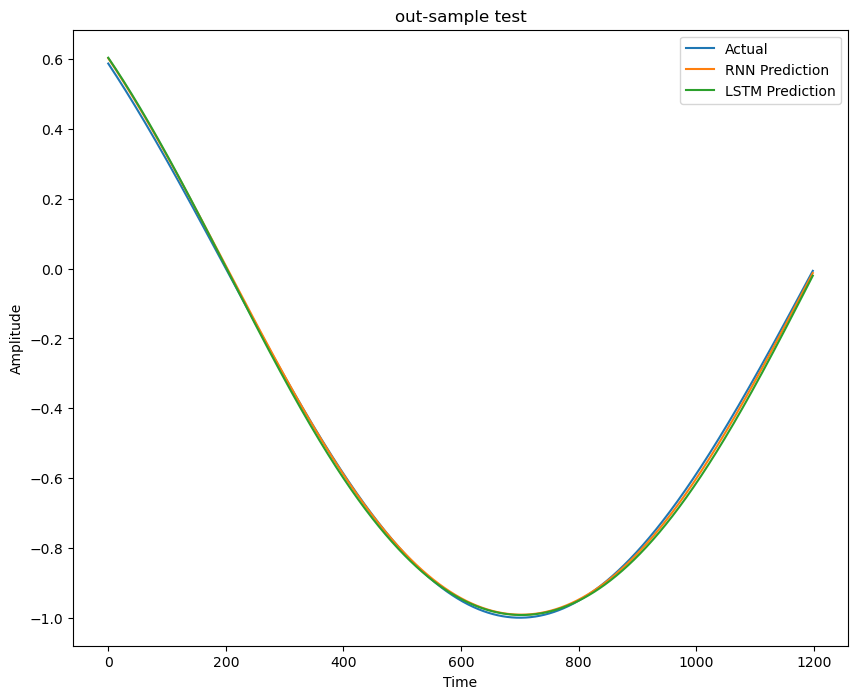

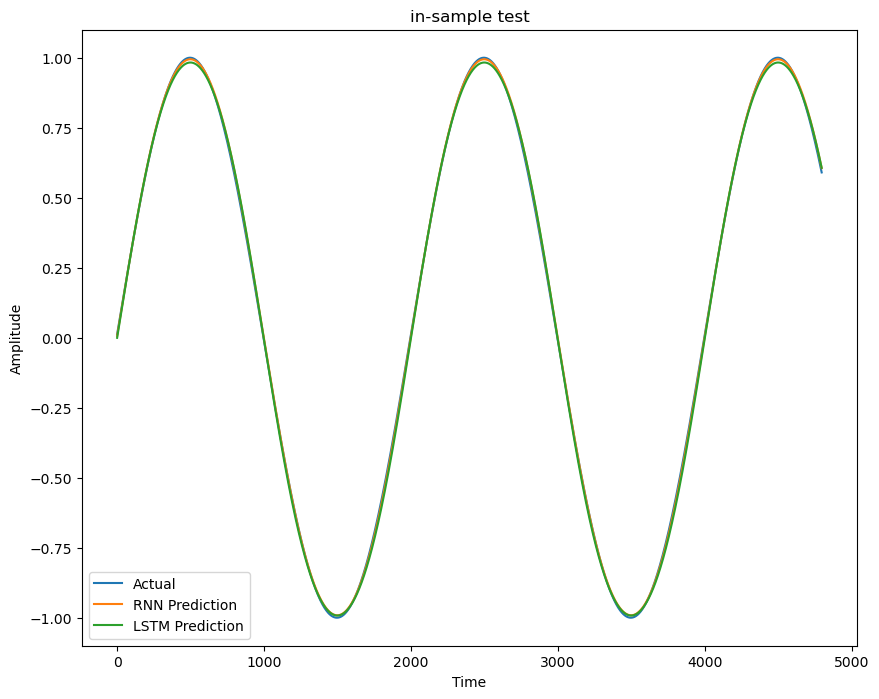

lstm mse 0.00021267351768700058
rnn mse 8.089176742426682e-05


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

# Generate the sinusoidal wave data
period = 20  # Period of the sinusoidal wave in seconds
sample_rate = 100  # Sample rate in Hz
num_periods = 3  # Number of periods of data to generate
total_samples = int(period * sample_rate * num_periods)

time = np.arange(total_samples) / sample_rate #每一个采样点所在的时间坐标
amplitude = np.sin(2 * np.pi * time / period)

# Prepare the data for RNN/LSTM training
input_size = 4  # Size of the input vector
output_size = 2  # Size of the output vector
input_train, input_test, output_train, output_test = data_split(amplitude, input_size,output_size,0.8)
a=np.concatenate((output_train[:,1],output_test[:, 1]))
print(a)
# Reshape the input data for RNN/LSTM
# because the RNN layer expects a 3-dimensional input shape
# -1 in the reshape function indicates that the size of that dimension 
# will be inferred based on the other dimensions and the total number of samples.
input_train = input_train.reshape(-1, input_size, 1)
input_test = input_test.reshape(-1, input_size, 1)
# Design and train the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(input_size, 1)))
rnn_model.add(Dense(output_size))
rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.fit(input_train, output_train, epochs=1, batch_size=8, verbose=1)

# Design and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(input_size, 1)))
lstm_model.add(Dense(output_size))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(input_train, output_train, epochs=1, batch_size=8, verbose=1)

# Make predictions (in-sample)
rnn_in_pre = rnn_model.predict(input_train)
lstm_in_pre = lstm_model.predict(input_train)
# Make predictions (out-of-sample)
rnn_predictions = rnn_model.predict(input_test)
lstm_predictions = lstm_model.predict(input_test)

# Plot the predicted and actual values
plt.figure(figsize=(10, 8))
#plt.plot(amplitude[:])
plt.plot(output_test[:, 0], label='Actual')
plt.plot(rnn_predictions[:, 0], label='RNN Prediction')
plt.plot(lstm_predictions[:, 0], label='LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('out-sample test')
plt.legend()
plt.show()
# plt.plot(np.concatenate((output_train[:,1],output_test[:, 1])), label='Actual (Step 2)',color='red')
# plt.plot(np.concatenate((rnn_in_pre[:,1],rnn_predictions[:, 1])), label='RNN Prediction (Step 2)')
# plt.plot(np.concatenate((lstm_in_pre[:,1],lstm_predictions[:, 1])), label='LSTM Prediction (Step 2)')
plt.figure(figsize=(10, 8))
plt.plot(output_train[:, 0], label='Actual')
plt.plot(rnn_in_pre[:, 0], label='RNN Prediction')
plt.plot(lstm_in_pre[:, 0], label='LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('in-sample test')
plt.legend()
plt.show()

lstm_mse = np.mean(np.square(np.concatenate((lstm_in_pre[:,1],lstm_predictions[:, 1]))-
                        np.concatenate((output_train[:,1],output_test[:, 1]))))
print("lstm mse",lstm_mse)
rnn_mse = np.mean(np.square(np.concatenate((rnn_in_pre[:,1],rnn_predictions[:, 1]))-
                        np.concatenate((output_train[:,1],output_test[:, 1]))))
print("rnn mse",rnn_mse)

### 4.

38/38 [==============================] - 0s 1ms/step


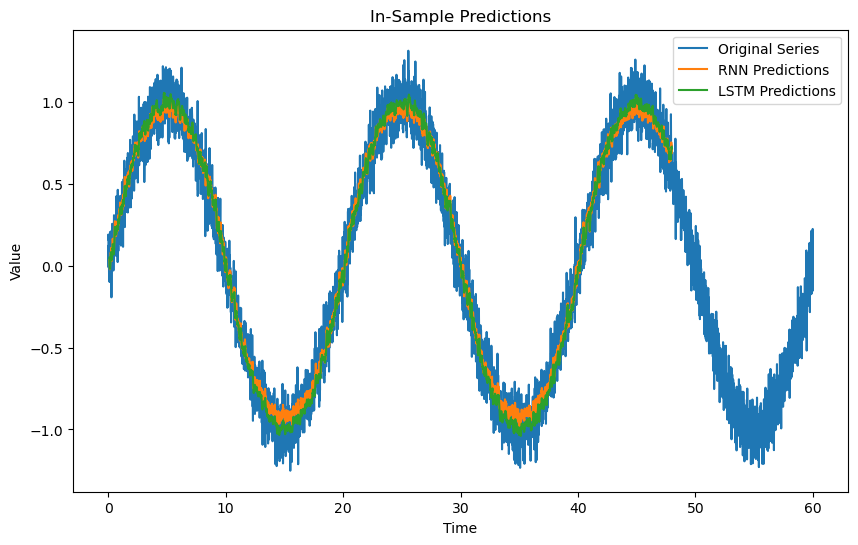

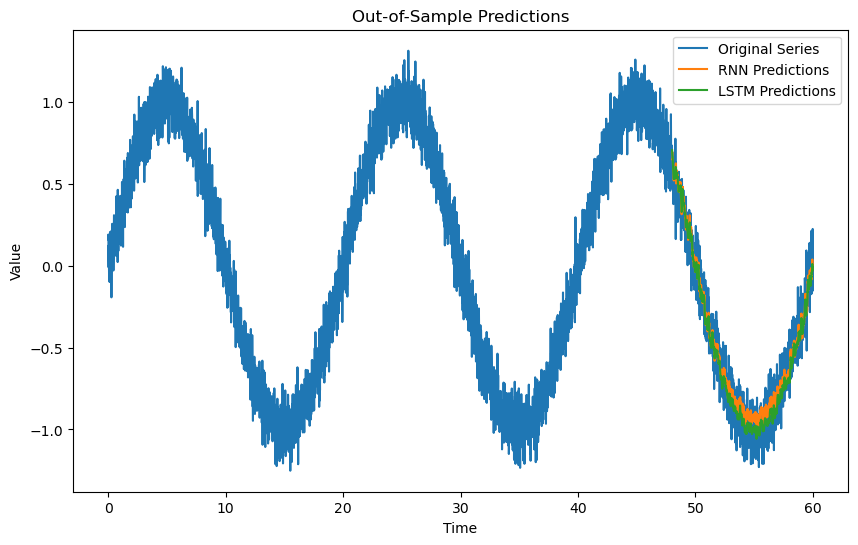

lstm mse 0.012424462112054982
rnn mse 0.01313652257107088


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

# Parameters
period = 20
sample_rate = 100
noise_amplitude = 0.1
input_size = 10
output_size = 2
train_ratio = 0.8

# Generate time series data
t = np.arange(0, 3 * period, 1 / sample_rate)
amplitude = np.sin(2 * np.pi * t / period)
noise = noise_amplitude * np.random.normal(0, np.sqrt(1), len(t))
series = amplitude + noise

# Split data into train and test sets
input_train, input_test, output_train, output_test = data_split(series, input_size, output_size, train_ratio)

# Reshape input arrays for RNN/LSTM
input_train = np.reshape(input_train, (input_train.shape[0], input_train.shape[1], 1))
input_test = np.reshape(input_test, (input_test.shape[0], input_test.shape[1], 1))

# Design and train the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(input_size, 1)))
rnn_model.add(Dense(output_size))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(input_train, output_train, epochs=1, batch_size=32, verbose=1)

# Design and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(input_size, 1)))
lstm_model.add(Dense(output_size))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(input_train, output_train, epochs=1, batch_size=32, verbose=1)

# Perform in-sample predictions
rnn_predictions = rnn_model.predict(input_train)
lstm_predictions = lstm_model.predict(input_train)

# Perform out-of-sample predictions
rnn_out_of_sample_predictions = rnn_model.predict(input_test)
lstm_out_of_sample_predictions = lstm_model.predict(input_test)

# Plot the original series and predictions
plt.figure(figsize=(10, 6))
plt.plot(t, series, label='Original Series')
plt.plot(t[input_size:input_size+len(rnn_predictions)], rnn_predictions[:, 1], label='RNN Predictions')
plt.plot(t[input_size:input_size+len(lstm_predictions)], lstm_predictions[:, 1], label='LSTM Predictions')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('In-Sample Predictions')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, series, label='Original Series')
plt.plot(t[len(input_train)+input_size:len(input_train)+input_size+len(rnn_out_of_sample_predictions)],
         rnn_out_of_sample_predictions[:, 1], label='RNN Predictions')
plt.plot(t[len(input_train)+input_size:len(input_train)+input_size+len(lstm_out_of_sample_predictions)],
         lstm_out_of_sample_predictions[:, 1], label='LSTM Predictions')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Out-of-Sample Predictions')
plt.show()

lstm_mse = np.mean(np.square(np.concatenate((lstm_predictions[:, 1],lstm_out_of_sample_predictions[:,1]))-
                        np.concatenate((output_train[:,1],output_test[:, 1]))))
print("lstm mse",lstm_mse)
rnn_mse = np.mean(np.square(np.concatenate((rnn_predictions[:, 1],rnn_out_of_sample_predictions[:,1]))-
                        np.concatenate((output_train[:,1],output_test[:, 1]))))
print("rnn mse",rnn_mse)

## Task 1.2 Predict white noise, random walk, an ARMA process using neural networks

In [2]:
import random
import numpy as np
from random import gauss
from random import seed
from pandas import Series
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess

N=1000
# seed the random number generator
seed(10)
# create white noise series
wn_series = np.random.normal(0, np.sqrt(1), N)

# create random walk series
x_binary = [-1,1]
rw_series = [1]

for i in range(N-1):
    x = random.choice(x_binary)
    rw_series.append(rw_series[i]+x)

rw_series = Series(rw_series)

# Parameters
ar_params = np.array([0.75, -0.25] ) # AR parameters
ma_params = np.array([0.5, -0.4])  # MA parameters
noise_variance = 1  # Variance of the white noise

# Generate the ARMA(2, 2) process
arma_process = ArmaProcess(ar_params, ma_params)
arma_series = arma_process.generate_sample(N)
#print(wn_series,rw_series,arma_series)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.9364
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9281
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9245
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9249
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9236
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9254
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9260
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9225
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9216
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9218
Epoch 11/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9225
Epoch 12/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9203
Epoch 13/100
25/25 [=================

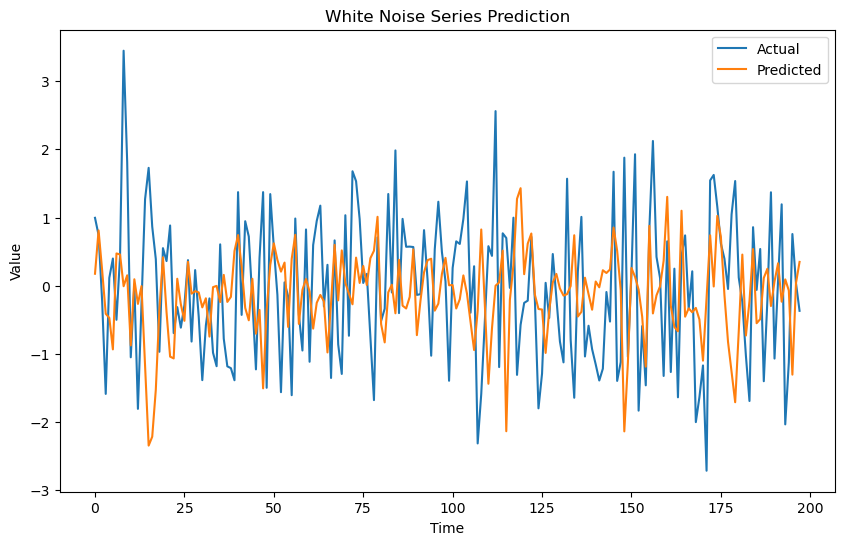

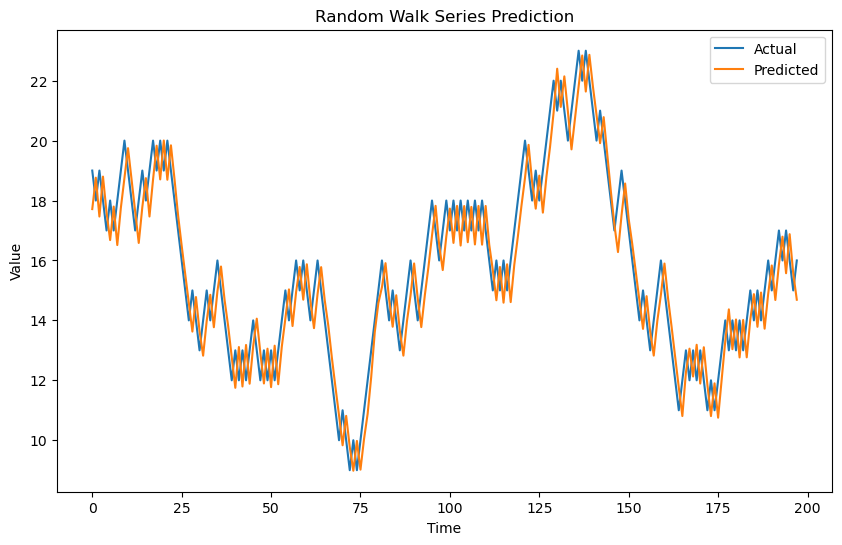

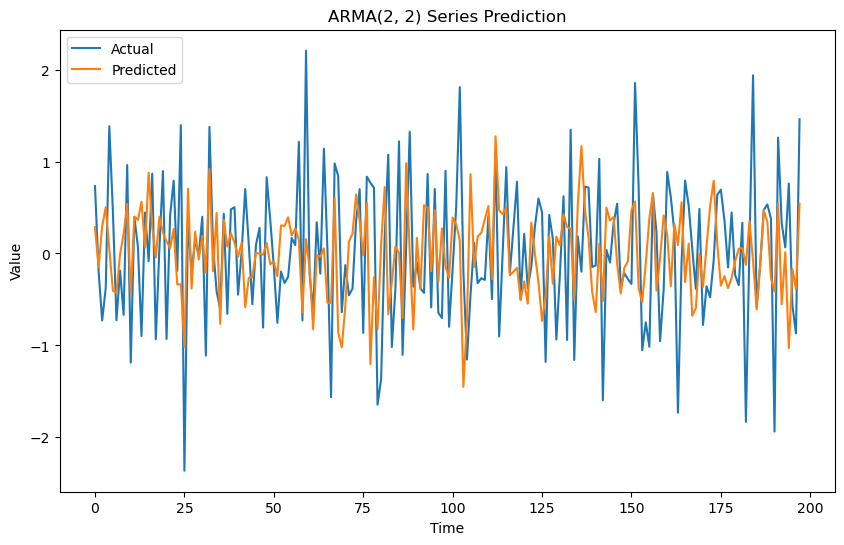

1.6071599716025586 1.05404965488953 0.599318978615786


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

input_size=10
output_size=1
wn_input_train, wn_input_test, wn_output_train, wn_output_test = data_split(wn_series, input_size, output_size, 0.8)
rw_input_train, rw_input_test, rw_output_train, rw_output_test = data_split(rw_series, input_size, output_size, 0.8)
arma_input_train, arma_input_test, arma_output_train, arma_output_test = data_split(arma_series, input_size, output_size, 0.8)

# Build the neural network model (LSTM)
model = Sequential()
model.add(LSTM(64, input_shape=(input_size, 1)))
model.add(Dense(32))
model.add(Dense(output_size))
model.compile(optimizer='adam', loss='mse')

# Train the model on white noise series
model.fit(wn_input_train, wn_output_train, epochs=100, batch_size=32, verbose=1)

# Test the model on white noise series
wn_predictions = model.predict(wn_input_test)

# Train the model on random walk series
model.fit(rw_input_train, rw_output_train, epochs=100, batch_size=32, verbose=1)

# Test the model on random walk series
rw_predictions = model.predict(rw_input_test)

# Train the model on ARMA(2, 2) series
model.fit(arma_input_train, arma_output_train, epochs=100, batch_size=32, verbose=1)

# Test the model on ARMA(2, 2) series
arma_predictions = model.predict(arma_input_test)

# Plot the predictions for white noise series
plt.figure(figsize=(10, 6))
plt.plot(wn_output_test[:, 0], label='Actual')
plt.plot(wn_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('White Noise Series Prediction')
plt.legend()
plt.show()

# Plot the predictions for random walk series
plt.figure(figsize=(10, 6))
plt.plot(rw_output_test[:, 0], label='Actual')
plt.plot(rw_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Random Walk Series Prediction')
plt.legend()
plt.show()

# Plot the predictions for ARMA(2, 2) series
plt.figure(figsize=(10, 6))
plt.plot(arma_output_test[:, 0], label='Actual')
plt.plot(arma_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARMA(2, 2) Series Prediction')
plt.legend()
plt.show()

wn_mse = np.mean(np.square(wn_output_test-wn_predictions))
rw_mse = np.mean(np.square(rw_output_test-rw_predictions))
arma_mse=np.mean(np.square(arma_output_test-arma_predictions))
print(wn_mse,rw_mse,arma_mse)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 1.3642
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9544
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9278
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9187
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9170
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9148
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9156
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9178
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9142
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9154
Epoch 11/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9143
Epoch 12/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9184
Epoch 13/100
25/25 [=================

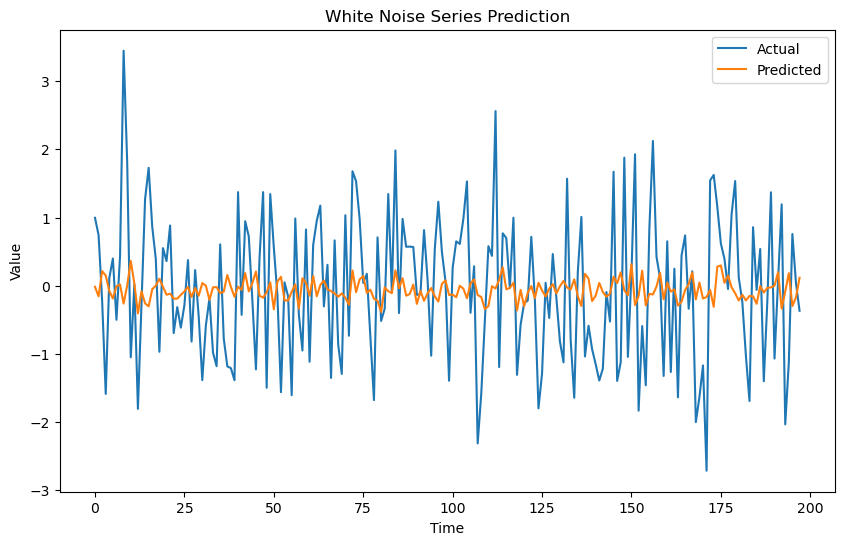

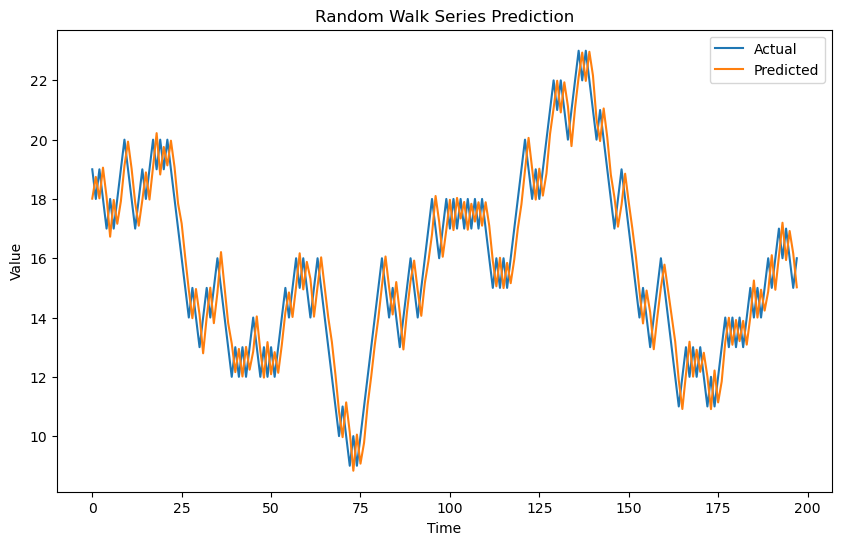

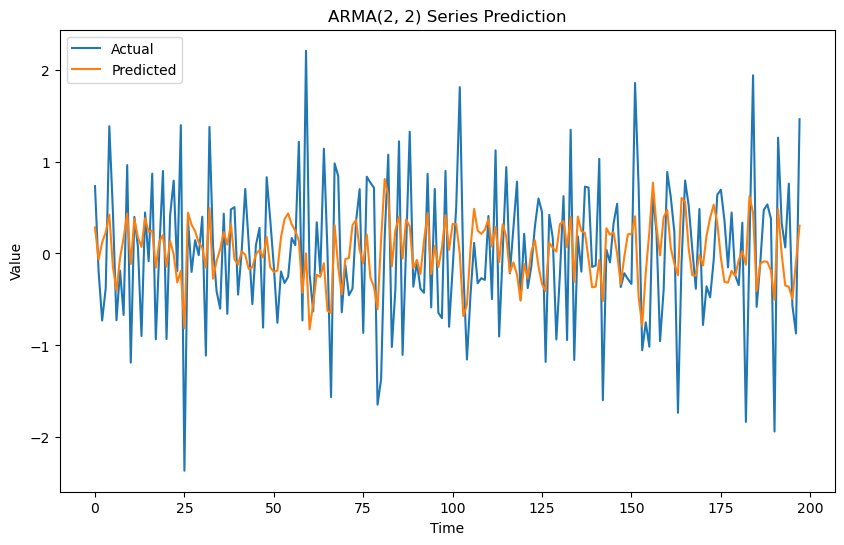

1.1395124546576219 1.0060016099203337 0.4741424611583072


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

input_size=10
output_size=1
wn_input_train, wn_input_test, wn_output_train, wn_output_test = data_split(wn_series, input_size, output_size, 0.8)
rw_input_train, rw_input_test, rw_output_train, rw_output_test = data_split(rw_series, input_size, output_size, 0.8)
arma_input_train, arma_input_test, arma_output_train, arma_output_test = data_split(arma_series, input_size, output_size, 0.8)

# Build the neural network model
# model = Sequential()
# model.add(LSTM(64, input_shape=(input_size, 1)))
# model.add(Dense(output_size))
# model.compile(optimizer='adam', loss='mse')
model = Sequential()
model.add(SimpleRNN(10, input_shape=(input_size, 1),activation='linear'))
model.add(Dense(32,activation='linear'))

model.add(Dense(output_size))
model.compile(optimizer='adam', loss='mse')



# Train the model on white noise series
model.fit(wn_input_train, wn_output_train, epochs=100, batch_size=32, verbose=1)

# Test the model on white noise series
wn_predictions = model.predict(wn_input_test)

# Train the model on random walk series
model.fit(rw_input_train, rw_output_train, epochs=100, batch_size=32, verbose=1)

# Test the model on random walk series
rw_predictions = model.predict(rw_input_test)

# Train the model on ARMA(2, 2) series
model.fit(arma_input_train, arma_output_train, epochs=100, batch_size=32, verbose=1)

# Test the model on ARMA(2, 2) series
arma_predictions = model.predict(arma_input_test)

# Plot the predictions for white noise series
plt.figure(figsize=(10, 6))
plt.plot(wn_output_test[:, 0], label='Actual')
plt.plot(wn_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('White Noise Series Prediction')
plt.legend()
plt.show()

# Plot the predictions for random walk series
plt.figure(figsize=(10, 6))
plt.plot(rw_output_test[:, 0], label='Actual')
plt.plot(rw_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Random Walk Series Prediction')
plt.legend()
plt.show()

# Plot the predictions for ARMA(2, 2) series
plt.figure(figsize=(10, 6))
plt.plot(arma_output_test[:, 0], label='Actual')
plt.plot(arma_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARMA(2, 2) Series Prediction')
plt.legend()
plt.show()

wn_mse = np.mean(np.square(wn_output_test-wn_predictions))
rw_mse = np.mean(np.square(rw_output_test-rw_predictions))
arma_mse=np.mean(np.square(arma_output_test-arma_predictions))
print(wn_mse,rw_mse,arma_mse)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 1.0295
Epoch 2/100
25/25 [==============================] - 0s 752us/step - loss: 0.9287
Epoch 3/100
25/25 [==============================] - 0s 708us/step - loss: 0.9057
Epoch 4/100
25/25 [==============================] - 0s 709us/step - loss: 0.9035
Epoch 5/100
25/25 [==============================] - 0s 786us/step - loss: 0.8984
Epoch 6/100
25/25 [==============================] - 0s 797us/step - loss: 0.8969
Epoch 7/100
25/25 [==============================] - 0s 787us/step - loss: 0.8967
Epoch 8/100
25/25 [==============================] - 0s 719us/step - loss: 0.8960
Epoch 9/100
25/25 [==============================] - 0s 753us/step - loss: 0.8968
Epoch 10/100
25/25 [==============================] - 0s 800us/step - loss: 0.8971
Epoch 11/100
25/25 [==============================] - 0s 751us/step - loss: 0.8968
Epoch 12/100
25/25 [==============================] - 0s 738us/step - loss: 0.8958
Epoch 13/100
25

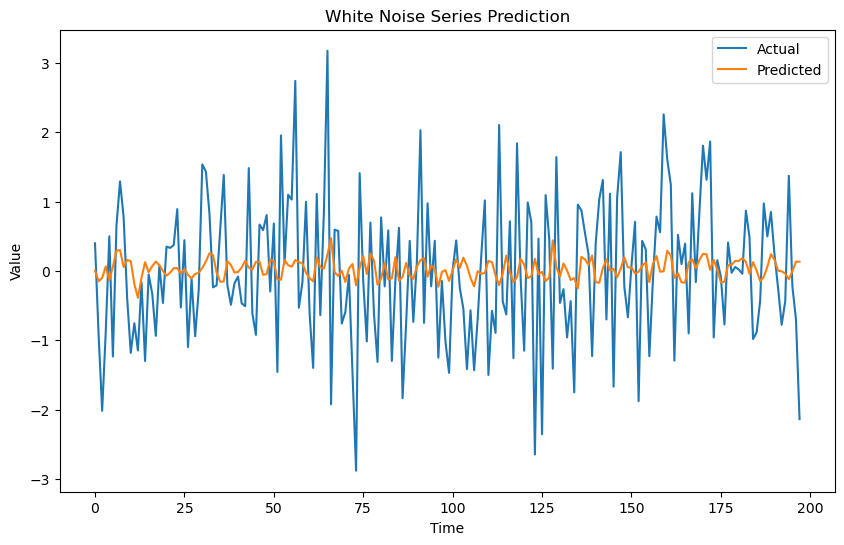

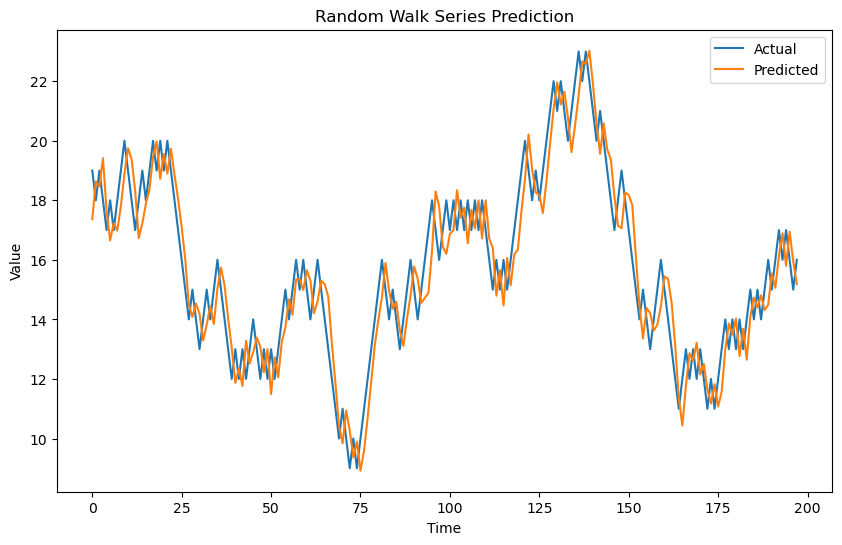

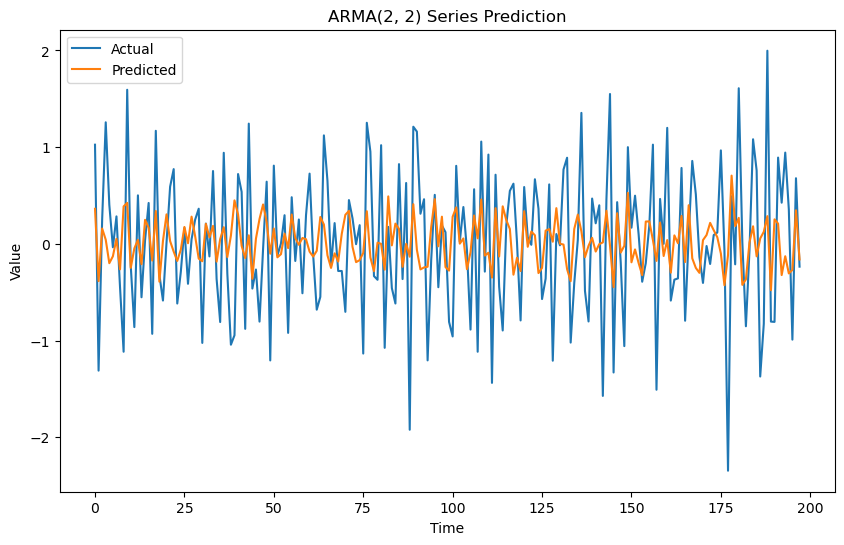

1.0599976754698894 1.1084398235424295 0.4918027543541102


In [6]:

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from sklearn.model_selection import train_test_split

input_size=10
output_size=1
wn_input_train, wn_input_test, wn_output_train, wn_output_test = data_split(wn_series, input_size, output_size, 0.8)
rw_input_train, rw_input_test, rw_output_train, rw_output_test = data_split(rw_series, input_size, output_size, 0.8)
arma_input_train, arma_input_test, arma_output_train, arma_output_test = data_split(arma_series, input_size, output_size, 0.8)

# Build the neural network model
# model = Sequential()
# model.add(LSTM(64, input_shape=(input_size, 1)))
# model.add(Dense(output_size))
# model.compile(optimizer='adam', loss='mse')
# model = Sequential()
# model.add(SimpleRNN(64, input_shape=(input_size, 1)))
# model.add(Dense(output_size))
# model.compile(optimizer='adam', loss='mse')
model = Sequential()
model.add(Dense(5, input_dim=input_size, activation='linear'))
model.add(Dense(32,activation='linear'))

model.add(Dense(output_size, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')


# Train the model on white noise series
model.fit(wn_input_train, wn_output_train, epochs=100, batch_size=32, verbose=1)

# Test the model on white noise series
wn_predictions = model.predict(wn_input_test)

# Train the model on random walk series
model.fit(rw_input_train, rw_output_train, epochs=100, batch_size=32, verbose=1)

# Test the model on random walk series
rw_predictions = model.predict(rw_input_test)

# Train the model on ARMA(2, 2) series
model.fit(arma_input_train, arma_output_train, epochs=100, batch_size=32, verbose=1)

# Test the model on ARMA(2, 2) series
arma_predictions = model.predict(arma_input_test)

# Plot the predictions for white noise series
plt.figure(figsize=(10, 6))
plt.plot(wn_output_test[:, 0], label='Actual')
plt.plot(wn_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('White Noise Series Prediction')
plt.legend()
plt.show()

# Plot the predictions for random walk series
plt.figure(figsize=(10, 6))
plt.plot(rw_output_test[:, 0], label='Actual')
plt.plot(rw_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Random Walk Series Prediction')
plt.legend()
plt.show()

# Plot the predictions for ARMA(2, 2) series
plt.figure(figsize=(10, 6))
plt.plot(arma_output_test[:, 0], label='Actual')
plt.plot(arma_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARMA(2, 2) Series Prediction')
plt.legend()
plt.show()

wn_mse = np.mean(np.square(wn_output_test-wn_predictions))
rw_mse = np.mean(np.square(rw_output_test-rw_predictions))
arma_mse=np.mean(np.square(arma_output_test-arma_predictions))
print(wn_mse,rw_mse,arma_mse)

## 1.3

In [46]:
import numpy as np
import random
from sklearn.model_selection import train_test_split

def generate_fibonacci(length):
    fibonacci_series = [0, 1]
    while len(fibonacci_series) < length:
        next_num = fibonacci_series[-1] + fibonacci_series[-2]
        fibonacci_series.append(next_num)
    return np.array(fibonacci_series)

def add_gaussian_noise(signal, noise_ratio):
    noise_amplitude = np.max(signal) * noise_ratio
    noise = np.random.normal(0, noise_amplitude, len(signal))
    noisy_signal = signal + noise
    return noisy_signal

# Generate the Fibonacci series
length = 50
fibonacci_series = generate_fibonacci(length)
#print(fibonacci_series)
# Add Gaussian noise to the Fibonacci series
noise_ratio = 0.05
noisy_series = add_gaussian_noise(fibonacci_series, noise_ratio)
#random.shuffle(noisy_series)
train_set_orig, test_set_orig = train_test_split(noisy_series, test_size=0.2, random_state=20)
train_set = np.log10(train_set_orig+10000000000)
test_set = np.log10(test_set_orig+10000000000)
series = np.log10(noisy_series+10000000000)

In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
# Step 2: Build MLP Model
mlp_model = Sequential()
mlp_model.add(Dense(64, activation='relu', input_shape=(1,)))
mlp_model.add(Dense(32))
mlp_model.add(Dense(16))
mlp_model.add(Dense(1))
mlp_model.compile(optimizer='adam', loss='mean_squared_error')

mlp_train_X = np.arange(len(train_set)).reshape(-1, 1)
mlp_train_y = np.array(train_set).reshape(-1, 1)

mlp_model.fit(mlp_train_X, mlp_train_y, epochs=500, batch_size=3)

# Step 3: Build RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, activation='relu', input_shape=(1, 1)))
rnn_model.add(Dense(32))
rnn_model.add(Dense(16))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

rnn_train_X = np.array(train_set[:-1]).reshape(-1, 1, 1)
rnn_train_y = np.array(train_set[1:]).reshape(-1, 1, 1)

rnn_model.fit(rnn_train_X, rnn_train_y, epochs=500, batch_size=3)

# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64,  activation='relu',input_shape=(1, 1)))
lstm_model.add(Dense(32))
lstm_model.add(Dense(16))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_train_X = np.array(train_set[:-1]).reshape(-1, 1, 1)
lstm_train_y = np.array(train_set[1:]).reshape(-1, 1, 1)

lstm_model.fit(lstm_train_X, lstm_train_y, epochs=500, batch_size=3)


# Compare Model Accuracy
mlp_test_X = np.arange(len(test_set)).reshape(-1, 1)
mlp_test_pred = mlp_model.predict(mlp_test_X)



rnn_test_X = np.array(test_set[:-1]).reshape(-1, 1, 1)
rnn_test_pred = rnn_model.predict(rnn_test_X)

lstm_test_X = np.array(test_set[:-1]).reshape(-1, 1, 1)
lstm_test_pred = lstm_model.predict(lstm_test_X)


# Calculate prediction errors
mlp_mse = mean_squared_error(test_set, mlp_test_pred)
mlp_mae = mean_absolute_error(test_set, mlp_test_pred)
mlp_mape = mean_absolute_percentage_error(test_set, mlp_test_pred)
rnn_mse = mean_squared_error(test_set[1:], rnn_test_pred)
rnn_mae = mean_absolute_error(test_set[1:], rnn_test_pred)
rnn_mape = mean_absolute_percentage_error(test_set[1:], rnn_test_pred)
lstm_mse = mean_squared_error(test_set[1:], lstm_test_pred)
lstm_mae = mean_absolute_error(test_set[1:], lstm_test_pred)
lstm_mape = mean_absolute_percentage_error(test_set[1:], lstm_test_pred)


print("MLP Test MSE:", mlp_mse)
print("MLP Test MAE:", mlp_mae)
print("MLP Test MAPE:", mlp_mape)

print("RNN Test MSE:", rnn_mse)
print("RNN Test MAE:", rnn_mae)
print("RNN Test MAPE:", rnn_mape)

print("LSTM Test MSE:", lstm_mse)
print("LSTM Test MAE:", lstm_mae)
print("LSTM Test MAPE:", lstm_mape)

Epoch 1/500
14/14 [==============================] - 0s 846us/step - loss: 120.9464
Epoch 2/500
14/14 [==============================] - 0s 827us/step - loss: 35.1845
Epoch 3/500
14/14 [==============================] - 0s 766us/step - loss: 24.6274
Epoch 4/500
14/14 [==============================] - 0s 865us/step - loss: 24.1138
Epoch 5/500
14/14 [==============================] - 0s 771us/step - loss: 23.3014
Epoch 6/500
14/14 [==============================] - 0s 846us/step - loss: 22.8127
Epoch 7/500
14/14 [==============================] - 0s 769us/step - loss: 22.4170
Epoch 8/500
14/14 [==============================] - 0s 769us/step - loss: 22.7327
Epoch 9/500
14/14 [==============================] - 0s 846us/step - loss: 22.3969
Epoch 10/500
14/14 [==============================] - 0s 849us/step - loss: 20.6281
Epoch 11/500
14/14 [==============================] - 0s 769us/step - loss: 20.3331
Epoch 12/500
14/14 [==============================] - 0s 769us/step - loss: 19.1317


1.0
0.9985890332870839
1.589593116883239e-14
[ 3.01548240e-02 -1.03257690e-02 -3.38759737e-02 -6.51524075e-03
  6.24185880e-02 -2.65444641e-02 -2.97924308e-02  1.28616868e-02
  1.60316054e-02  1.26598265e-02 -4.61305087e-02  4.24188072e-02
 -3.91540200e-02  4.83994049e-02 -4.22832966e-02  2.51986885e-02
  6.57322687e-03 -2.76940437e-02  3.04445335e-02 -6.57329587e-02
  5.45597865e-02  1.27105935e-02 -1.75443079e-02  1.36494846e-02
 -1.66109396e-02 -1.62529304e-02  4.43445746e-02 -2.96457146e-02
  6.94041242e-03  9.67966937e-03 -2.88939374e-02  5.24383223e-03
  3.55705952e-03  2.35857052e-02 -1.89771939e-02  1.90158541e-02
 -2.62950693e-02 -8.23993981e-03  2.50128281e-02 -1.40158024e-02
  2.59980557e-02 -2.81974539e-03 -4.21313620e-02  6.69821864e-02
 -1.13599510e-02  6.77701549e-05  3.45237857e-02  1.28300272e-02]


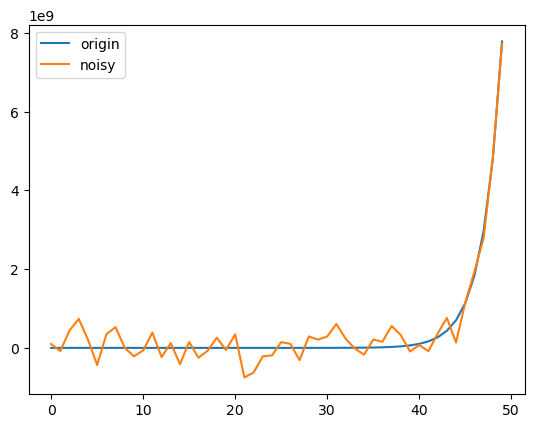

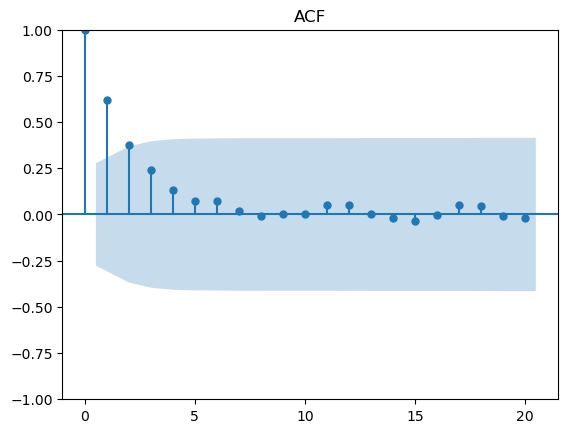

c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


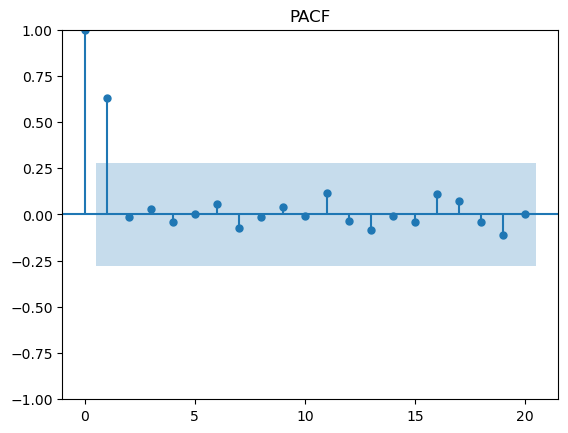

[0.02783356 0.01796706 0.02495517 0.02052078 0.0238275  0.02188802
 0.02350393 0.02271032 0.02354966 0.02328235]


c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


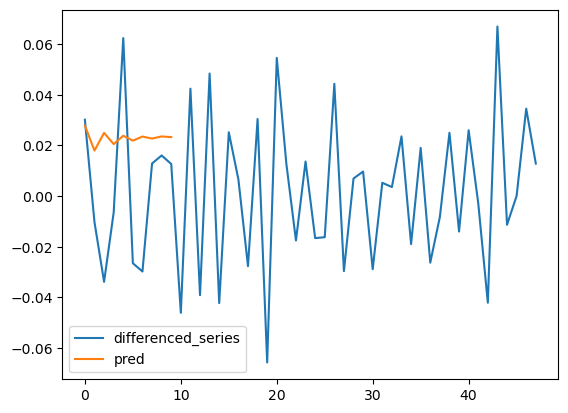

ARIMA Test MSE: 0.0011939756299448273
ARIMA Test MAE: 0.02847904063441603
ARIMA Test MAPE: 1.5008845888840798


In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
result = adfuller(series)
adf_statistic = result[0]
p_value = result[1]
print(p_value)
differenced_series = np.diff(series,1)
result = adfuller(differenced_series)
adf_statistic = result[0]
p_value = result[1]
print(p_value)
differenced_series = np.diff(series,2)
result = adfuller(differenced_series)
adf_statistic = result[0]
p_value = result[1]
print(p_value)
# differenced_series = np.diff(series,3)
# result = adfuller(differenced_series)
# adf_statistic = result[0]
# p_value = result[1]
# print(p_value)
print(differenced_series)

plt.plot(fibonacci_series,label="origin")
plt.plot(noisy_series,label="noisy")

plt.legend()
plt.show()

plot_acf(series, lags=20)
plt.title('ACF')
plt.show()

plot_pacf(series, lags=20)
plt.title('PACF')
plt.show()

test_set_arima = differenced_series[:10]
p=1
q=1
d=2
arima_model = ARIMA(differenced_series, order=(p, d, q))
arima_model_fit = arima_model.fit()
arima_test_pred = arima_model_fit.forecast(steps=len(test_set_arima))
print(arima_test_pred)
plt.plot(differenced_series, label = "differenced_series")
plt.plot(arima_test_pred, label = "pred")
plt.legend()
plt.show()
arima_mse = mean_squared_error(test_set_arima, arima_test_pred)
arima_mae = mean_absolute_error(test_set_arima,arima_test_pred)
arima_mape= mean_absolute_percentage_error(test_set_arima,arima_test_pred)

print("ARIMA Test MSE:", arima_mse)
print("ARIMA Test MAE:", arima_mae)
print("ARIMA Test MAPE:",arima_mape)


In [12]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Generate Fibonacci series
def generate_fibonacci_series(length):
    fibonacci = [0, 1]
    for i in range(2, length):
        fibonacci.append(fibonacci[i-1] + fibonacci[i-2])
    return fibonacci

# Generate Fibonacci series
fibonacci_series = generate_fibonacci_series(100)

# Split the data into training and testing sets
train_data = fibonacci_series[:80]
test_data = fibonacci_series[80:]

# Fit ARIMA model
model = ARIMA(train_data, order=(2, 0, 0))  # Adjust the order as per your requirements
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

# Print predictions
print("Predictions:", predictions)

# Evaluate model
mse = np.mean((predictions - test_data)**2)
mae = np.mean(np.abs(predictions - test_data))
mape = np.mean(np.abs((predictions - test_data) / test_data)) * 100

print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)

Predictions: [2.00001435e+16 2.55277787e+16 3.10551955e+16 3.65823498e+16
 4.21091977e+16 4.76356950e+16 5.31617976e+16 5.86874616e+16
 6.42126429e+16 6.97372974e+16 7.52613811e+16 8.07848499e+16
 8.63076599e+16 9.18297669e+16 9.73511270e+16 1.02871696e+17
 1.08391430e+17 1.13910285e+17 1.19428218e+17 1.24945183e+17]
MSE: 3.870755077820829e+39
MAE: 2.858300818973612e+19
MAPE: 83.82558304567915


c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Task 2. Decomposition-based anomaly detection

In [144]:
import pandas as pd
import numpy as np
df=pd.read_csv("GlobalTemperatures.csv",usecols=['dt','LandAverageTemperature'])
#temperature = df
df.columns =['dt','LandAverageTemperature']
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)
temperature = df
temperature_copy=temperature
temperature.loc['1998-12-1']=20
print(df)

            LandAverageTemperature
dt                                
1750-01-01                   3.034
1750-02-01                   3.083
1750-03-01                   5.626
1750-04-01                   8.490
1750-05-01                  11.573
...                            ...
2015-08-01                  14.755
2015-09-01                  12.999
2015-10-01                  10.801
2015-11-01                   7.433
2015-12-01                   5.518

[3192 rows x 1 columns]


            LandAverageTemperature
dt                                
1995-01-01                   3.540
1995-02-01                   4.656
1995-03-01                   5.956
1995-04-01                   8.972
1995-05-01                  11.570
...                            ...
1999-09-01                  12.723
1999-10-01                   9.997
1999-11-01                   6.592
1999-12-01                   4.565
2000-01-01                   2.950

[61 rows x 1 columns]


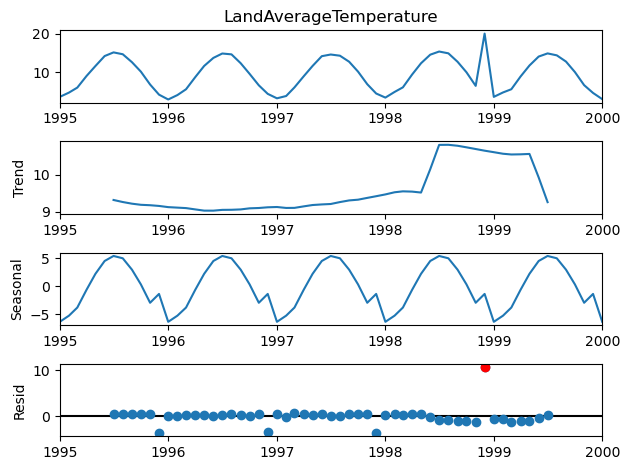

LandAverageTemperature   -6.7115
dtype: float64 LandAverageTemperature    25.9165
dtype: float64
DatetimeIndex([], dtype='datetime64[ns]', name='dt', freq=None)


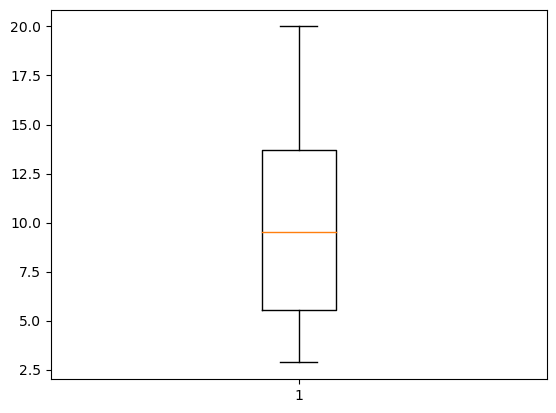

In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
#print(temperature['LandAverageTemperature'])

sample_temp= temperature.iloc[2940:3001, 0:1]
print(sample_temp)
# classic decomposition
result = seasonal_decompose(sample_temp['LandAverageTemperature'], model = 'additive', period=12)
trend = result.trend
seasonal = result.seasonal
residual = result.resid
fig = result.plot()

#set the threshold
threshold = 3
#calculate z-score
z_score = np.abs((residual - residual.mean()) / residual.std()) 
#find the location of the anomaly
ano_location = np.where(z_score>threshold)[0]
#Mark and visualize the anomalies in the series.
plt.plot(residual.index[ano_location], residual[ano_location], 'ro')
plt.show()

#boxplot
dataset = sample_temp
q1=dataset.quantile(0.25)
q3=dataset.quantile(0.75)
#print(q1,q3)

iqr = q3 - q1
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr
print(lower_threshold,upper_threshold)
anomaly_loc = np.where((dataset[:]<lower_threshold)|(dataset[:]>upper_threshold))[0]
anomaly = dataset.index[anomaly_loc]
print(anomaly)
plt.boxplot(sample_temp['LandAverageTemperature'],showfliers=True)

plt.show()

Z-score is a statistical measure that shows how many standard deviations a data point is from the mean of a dataset. It is calculated by subtracting the mean from the data point and then dividing the result by the standard deviation. The formula for z-score is:

z = (x - mean) / standard deviation

The resulting value tells us how many standard deviations a data point is from the mean. A z-score of 0 means the data point is at the mean, a z-score of +1 means the data point is 1 standard deviation above the mean, and a z-score of -1 means the data point is 1 standard deviation below the mean. The z-score can be used to identify outliers in a dataset, with values above a certain threshold considered outliers. The threshold can be set based on the desired level of significance or using a rule of thumb such as 3 standard deviations from the mean.

            LandAverageTemperature
dt                                
1983-05-01                  11.729
1983-06-01                  13.478
1983-07-01                  14.408
1983-08-01                  14.302
1983-09-01                  12.698
...                            ...
2015-08-01                  14.755
2015-09-01                  12.999
2015-10-01                  10.801
2015-11-01                   7.433
2015-12-01                   5.518

[392 rows x 1 columns]


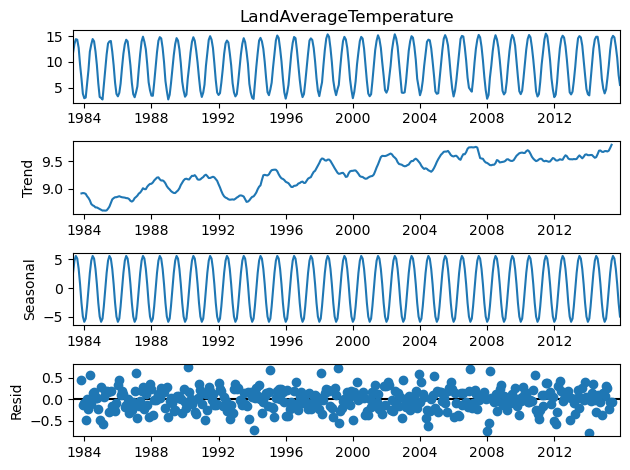

In [84]:
import pandas as pd
import numpy as np
df=pd.read_csv("GlobalTemperatures.csv",usecols=['dt','LandAverageTemperature'])
#temperature = df
df.columns =['dt','LandAverageTemperature']
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
#print(temperature['LandAverageTemperature'])

sample_temp= df.iloc[2800:3192]
print(sample_temp)
# classic decomposition
result = seasonal_decompose(sample_temp['LandAverageTemperature'], model = 'additive', period=12)
trend = result.trend
seasonal = result.seasonal
residual = result.resid
fig = result.plot()



# Task 3. Prediction-based anomaly detection

## Task 3.1 Anomaly detection for uni-variate series with ARIMA

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel('global-land-temperature-anomalies-1880-2020.xlsx', 'Data')
dataset= df.iloc[4:145, 1:3]
dataset.columns = ['Year', 'Temperature']
dataset['Year'] = pd.to_datetime(dataset['Year'])
dataset.set_index('Year', inplace=True)
print(dataset)

            Temperature
Year                   
1880-01-01        -0.50
1881-01-01        -0.43
1882-01-01        -0.46
1883-01-01        -0.67
1884-01-01        -0.71
...                 ...
2016-01-01         1.54
2017-01-01         1.41
2018-01-01         1.22
2019-01-01         1.43
2020-01-01         1.59

[141 rows x 1 columns]


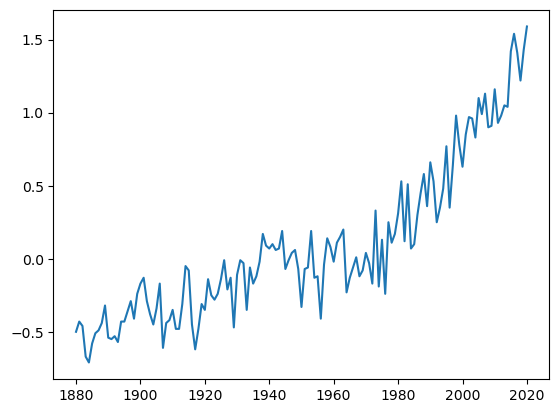

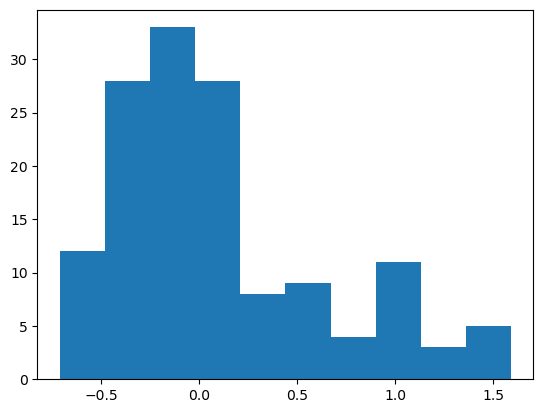

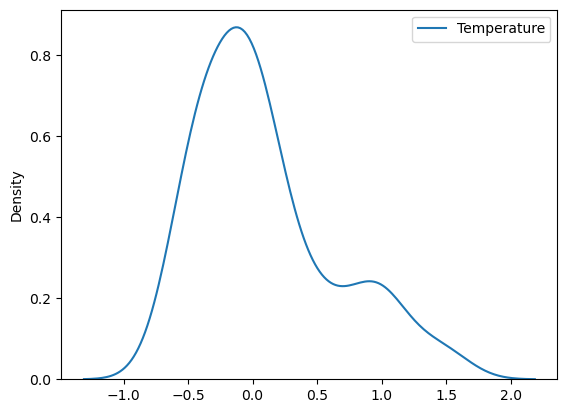

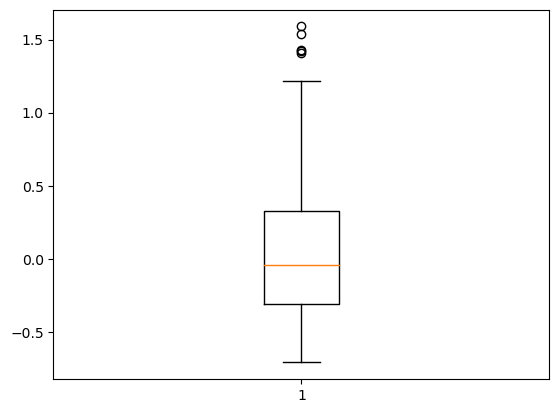

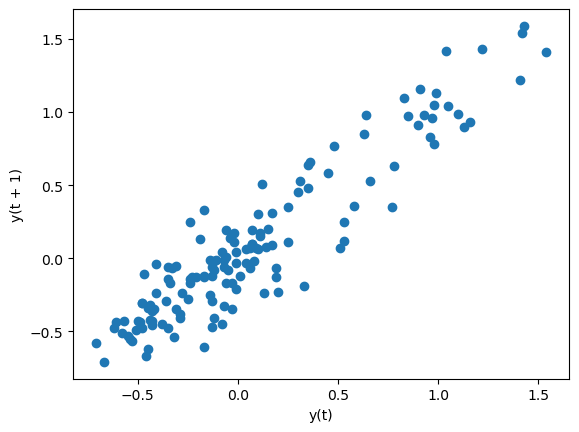

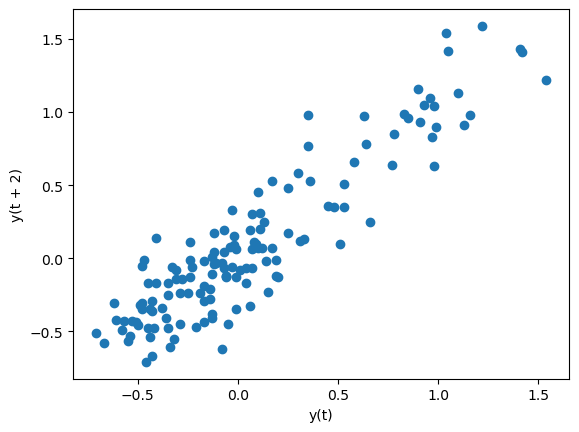

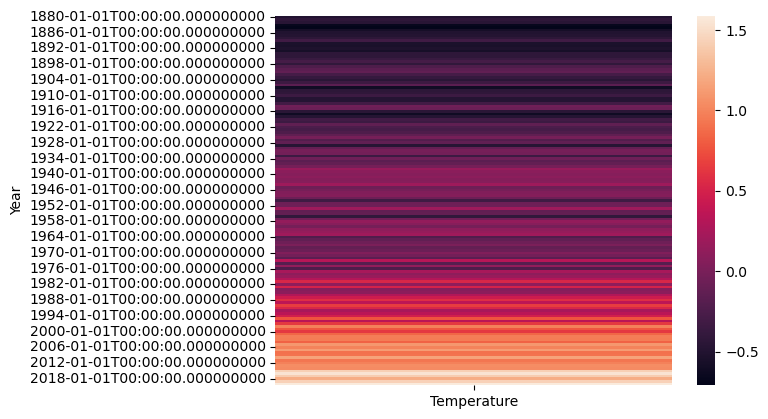

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
def draw_graph(timeseries,num):
    plt.plot(timeseries)
    plt.savefig(f'figure/lineplot_{num}.png')
    plt.show()
    
    # Histogram
    plt.hist(timeseries)
    plt.savefig(f'figure/histogram_{num}.png')
    plt.show()

    # Density plot
    sns.kdeplot(timeseries)
    plt.savefig(f'figure/density_{num}.png')
    plt.show()

    # Box plot
    plt.boxplot(timeseries)
    plt.savefig(f'figure/box_{num}.png')
    plt.show()

    plt.figure()
    series = pd.Series(timeseries['Temperature'])
    pd.plotting.lag_plot(series, lag=1)
    plt.savefig(f'figure/lagone_{num}.png')
    plt.show()
    plt.figure()
    pd.plotting.lag_plot(series, lag=2)
    plt.savefig(f'figure/lagtwo_{num}.png')
    plt.show()

    sns.heatmap(timeseries)
    plt.savefig(f'figure/heatmap_{num}.png')
    plt.show()


draw_graph(dataset,3.1)

In [165]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
    if result[1] > 0.05:
        print('The series is non-stationary.')
        return 0
    else:
        print('The series is stationary.')
        return 1


adf_test(dataset)

ADF Statistic: 0.9382926419378802
p-value: 0.993570249862259
Critical Values:
1%: -3.479007355368944
5%: -2.8828782366015093
10%: -2.5781488587564603
The series is non-stationary.


0

In [166]:
# Exploratory data analysis
def differencing(series):
    i = 0
    while True:
        differenced_data = series.diff().dropna()
        i = i+1
        if adf_test(differenced_data) == 1:
            print("The series becomes stationary after",i ,"differencing")
            return differenced_data
        else :
            series = differenced_data

stat_series = differencing(dataset)
print(stat_series)

ADF Statistic: -12.165503286659842
p-value: 1.4604869372130724e-22
Critical Values:
1%: -3.479007355368944
5%: -2.8828782366015093
10%: -2.5781488587564603
The series is stationary.
The series becomes stationary after 1 differencing
            Temperature
Year                   
1881-01-01         0.07
1882-01-01        -0.03
1883-01-01        -0.21
1884-01-01        -0.04
1885-01-01         0.13
...                 ...
2016-01-01         0.12
2017-01-01        -0.13
2018-01-01        -0.19
2019-01-01         0.21
2020-01-01         0.16

[140 rows x 1 columns]


before differencing:
Mean:  Temperature    0.090638
dtype: float64
Standard Deviation:  Temperature    0.535909
dtype: float64
after differencing:
Mean:  Temperature    0.014929
dtype: float64
Standard Deviation:  Temperature    0.199584
dtype: float64


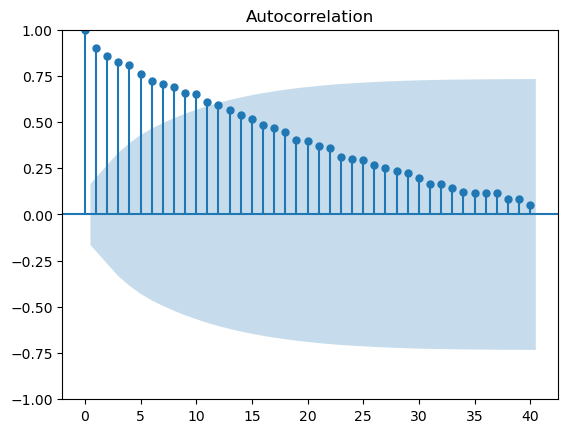

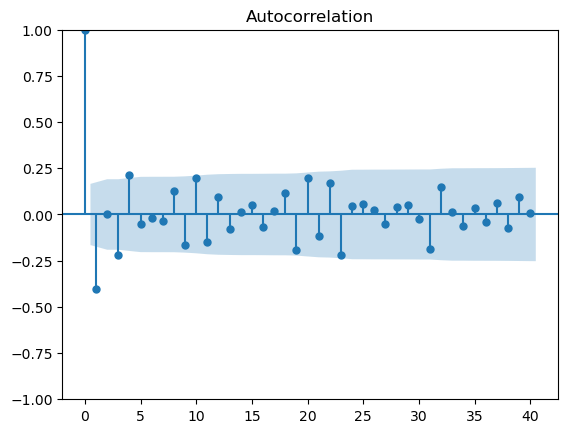

c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


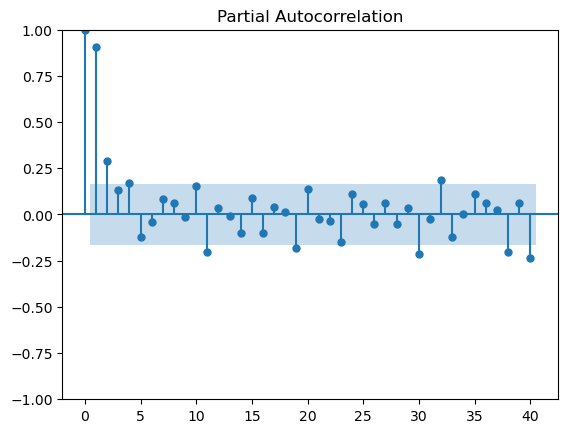

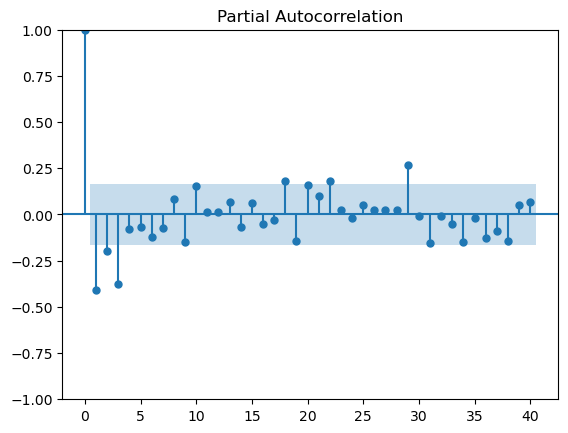

In [167]:
# Feature extraction
def stat_feature(series):
    mean = series.mean()
    std = series.std()
    print("Mean: ", mean)
    print("Standard Deviation: ", std)

print ("before differencing:")
stat_feature(dataset)
print ("after differencing:")
stat_feature(stat_series)

#plot acf & pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(dataset, lags=40)
plt.savefig(f'figure/acf_3_1_non_diff.png')
plt.show()

plot_acf(stat_series, lags=40)
plt.savefig(f'figure/acf_3_1_diff.png')
plt.show()

plot_pacf(dataset, lags=40)
plt.savefig(f'figure/pacf_3_1_non_diff.png')
plt.show()

plot_pacf(stat_series, lags=40)
plt.savefig(f'figure/pacf_3_1_diff.png')
plt.show()

Base on the ACF of the differenced series, choose p = 1 or 2.
Base on the PACF of the differenced series, choose q = 1 or 3.
d = 1 due to the first order differencing.

In [168]:
from statsmodels.tsa.arima.model import ARIMA
# model construction
model = ARIMA(stat_series, order=(2, 1, 3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                  140
Model:                 ARIMA(2, 1, 3)   Log Likelihood                  50.738
Date:                Sun, 11 Jun 2023   AIC                            -89.477
Time:                        20:16:27   BIC                            -71.870
Sample:                    01-01-1881   HQIC                           -82.322
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6914      0.151     -4.593      0.000      -0.987      -0.396
ar.L2          0.2521      0.115      2.194      0.028       0.027       0.477
ma.L1         -0.9277      0.136     -6.836      0.0

c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\base\model.

(1,1,1) AIC = -66.608
(1,1,3) AIC = -86.174
(2,1,1) -69.719
(2,1,3) -89.477
choose (2,1,3)

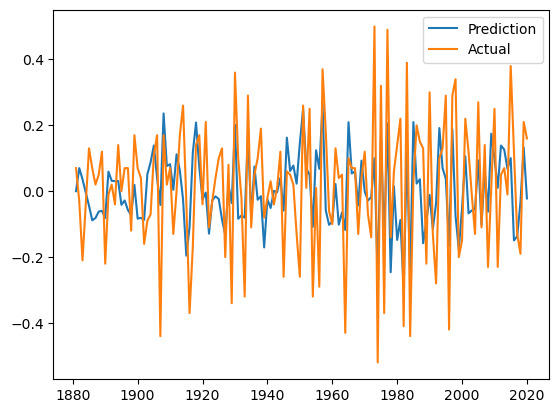

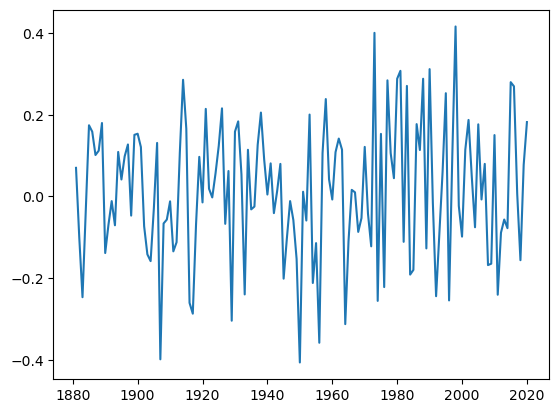

,lb_stat,lb_pvalue
1,0.021418,0.883647
2,0.784038,0.675691
3,1.832215,0.607950
4,2.998540,0.558070
5,3.254791,0.660770
6,5.466473,0.485518
7,5.630960,0.583438
8,5.748442,0.675386
9,6.205163,0.719222
10,7.298645,0.696982


In [169]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# prediction
# do in-sample prediction
pred = model_fit.predict(start=0, end = len(stat_series)-1)
#print(pred)
plt.plot(pred, label='Prediction')

#print(stat_series)
plt.plot(stat_series[0:141], label='Actual')

plt.savefig(f'figure/3_1_pre_actual.png')
plt.legend()
plt.show()
pre_error = model_fit.resid

#print (pvalue)
plt.plot(pre_error)
plt.savefig(f'figure/3_1_preerror.png')
plt.show()
acorr_ljungbox(pre_error, lags=10,return_df=True)

pvalue>0.05, prediction error series is random

In [170]:

z_score_3_1 = np.abs((dataset - dataset.mean()) / dataset.std()) 
threshold_3_1 = np.quantile(np.abs(z_score_3_1), 0.98) #anomaly ratio of 2%
print("threshold:", threshold_3_1)
print("z_score: ", z_score_3_1)
ano_location_3_1 = np.where(z_score_3_1>threshold_3_1)[0]
print(dataset.index[ano_location_3_1])


threshold: 2.4843037357523334
z_score:              Temperature
Year                   
1880-01-01     1.102123
1881-01-01     0.971504
1882-01-01     1.027484
1883-01-01     1.419341
1884-01-01     1.493981
...                 ...
2016-01-01     2.704490
2017-01-01     2.461912
2018-01-01     2.107374
2019-01-01     2.499232
2020-01-01     2.797790

[141 rows x 1 columns]
DatetimeIndex(['2016-01-01', '2019-01-01', '2020-01-01'], dtype='datetime64[ns]', name='Year', freq=None)


In [172]:
import pandas as pd
import matplotlib.pyplot as plt

q1=dataset.quantile(0.25)
q3=dataset.quantile(0.75)
print(q1,q3)

iqr = q3 - q1
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr
anomaly_loc = np.where((dataset[:]<lower_threshold)|(dataset[:]>upper_threshold))[0]
print(lower_threshold,upper_threshold)
anomaly = dataset.index[anomaly_loc]
print(anomaly)

Temperature   -0.31
Name: 0.25, dtype: float64 Temperature    0.33
Name: 0.75, dtype: float64
Temperature   -1.27
dtype: float64 Temperature    1.29
dtype: float64
DatetimeIndex(['2015-01-01', '2016-01-01', '2017-01-01', '2019-01-01',
               '2020-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)


## Task 3.2 Anomaly detection in ECG signals with LSTM

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv('100.csv',dtype={'Elapsed time': float, 'MLII': float,'V5':float})
ecg_index = df['\'Elapsed time\''][1:]
#print(ecg_index)
ecg_data = df.iloc[1:,1:]
ecg_data.set_index(ecg_index,inplace=True)
ecg_data = ecg_data.astype('float')
print(ecg_data)
mlii = ecg_data['\'MLII\'']
v5 = ecg_data['\'V5\'']



                'MLII'   'V5'
'Elapsed time'               
0               -0.145 -0.065
0.003           -0.145 -0.065
0.006           -0.145 -0.065
0.008           -0.145 -0.065
0.011           -0.145 -0.065
...                ...    ...
59.986          -0.220 -0.150
59.989          -0.210 -0.145
59.992          -0.230 -0.175
59.994          -0.245 -0.180
59.997          -0.245 -0.175

[21600 rows x 2 columns]


[]

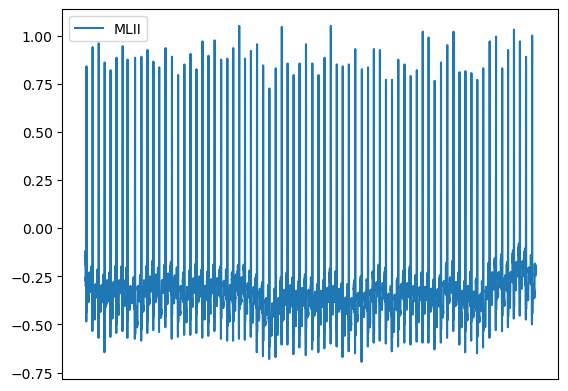

In [13]:
#line-plot

plt.figure()
plt.plot(mlii,label='MLII')
#plt.plot(v5.index,v5,label='V5')
plt.legend()
plt.xticks([])
plt.plot()


[]

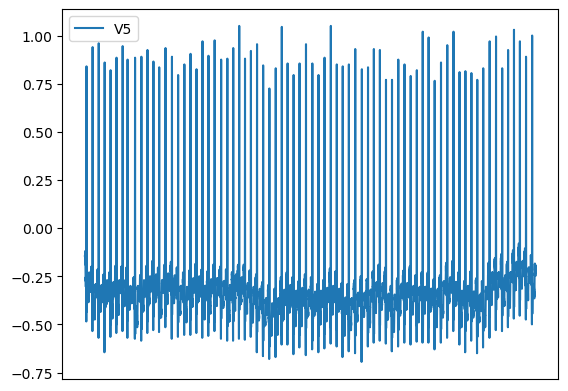

In [14]:
plt.figure()
plt.plot(mlii,label='V5')
#plt.plot(v5.index,v5,label='V5')
plt.legend()
plt.xticks([])
plt.plot()

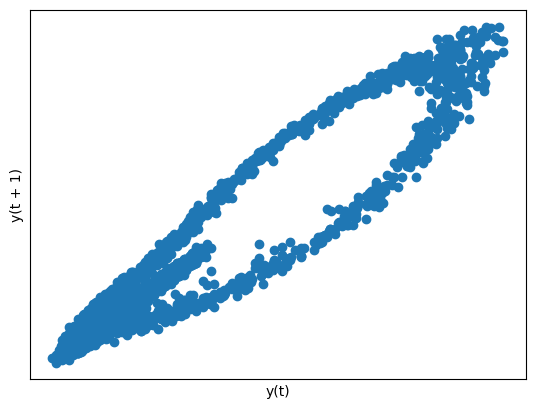

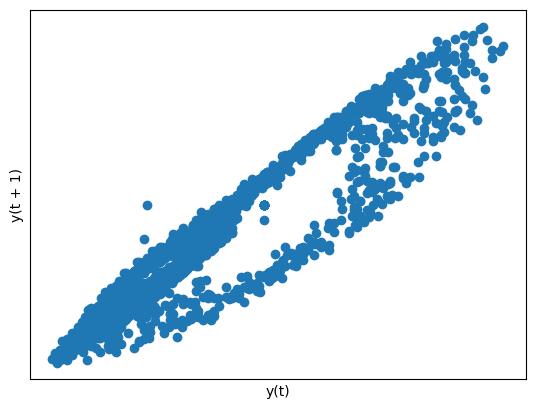

In [11]:
#lag-1
plt.figure()
series = pd.Series(mlii)
pd.plotting.lag_plot(series, lag=1)
plt.savefig(f'figure/mlii_lagone_1.png')
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure()
series = pd.Series(v5)
pd.plotting.lag_plot(series, lag=1)
plt.savefig(f'figure/v5_lagone_1.png')
plt.xticks([])
plt.yticks([])
plt.show()

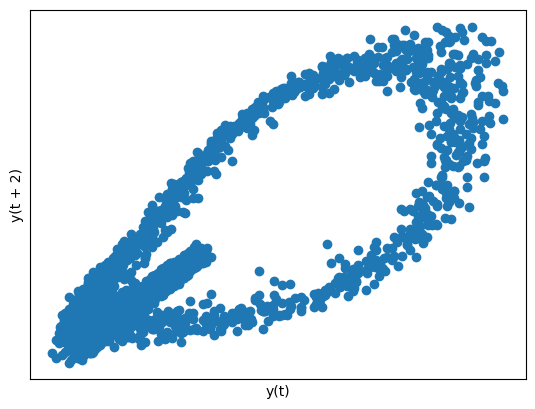

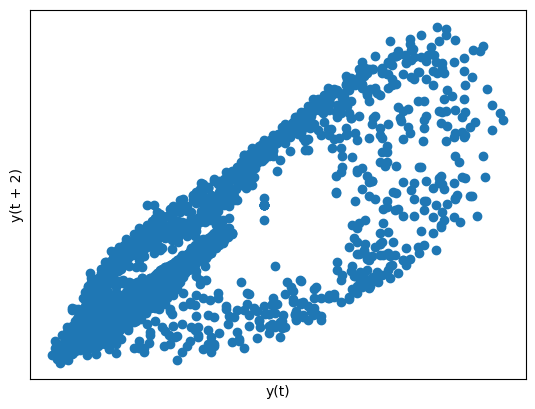

In [12]:
#lag-2
plt.figure()
series = pd.Series(mlii)
pd.plotting.lag_plot(series, lag=2)
plt.savefig(f'figure/mlii_lagtwo_1.png')
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure()
series = pd.Series(v5)
pd.plotting.lag_plot(series, lag=2)
plt.xticks([])
plt.yticks([])
plt.savefig(f'figure/v5_lagtwo_1.png')
plt.show()

They are obvious positively correlated.

In [17]:
def reshape_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps-1):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps:i+n_steps+1])
    return np.array(X), np.array(y)

In [133]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Model construction.
# split data
train_size = int(len(ecg_data)*0.8)#80%
ecg_train = ecg_data[:train_size]
ecg_test = ecg_data[train_size:]

# Normalize the data


n_steps = 16 # input vector size
mlii_train_in, mlii_train_out = reshape_data(mlii[:train_size],n_steps)
v5_train_in, v5_train_out = reshape_data(v5[:train_size],n_steps)
mlii_test_in, mlii_test_out = reshape_data(mlii[train_size:],n_steps)
v5_test_in, v5_test_out = reshape_data(v5[train_size:],n_steps)

in_train, out_train = reshape_data(ecg_train, n_steps)
in_test, out_test = reshape_data(ecg_test, n_steps)

#train LSTM
def lstm_build(input_shape):
    model = Sequential()
    model.add(LSTM(64,activation='relu', input_shape=input_shape))
    model.add((Dense(input_shape[-1])))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model





In [134]:

mlii_model = lstm_build((n_steps,1))
mlii_model.fit(mlii_train_in, mlii_train_out, epochs = 100, batch_size = 32, verbose = 0)

In [135]:
v5_model = lstm_build((n_steps,1))
v5_model.fit(v5_train_in, v5_train_out, epochs = 100, batch_size = 32, verbose = 0)

In [136]:
ecg_model = lstm_build((n_steps,2))
ecg_model.fit(in_train,out_train,epochs = 100, batch_size = 32, verbose = 0)

In [137]:
mlii_pred = mlii_model.predict(mlii_test_in)
#print(mlii_pred, mlii_test_out)

mlii_mse = mean_squared_error(mlii_pred, mlii_test_out)
mlii_mape = mean_absolute_percentage_error(mlii_pred, mlii_test_out)
print(mlii_mse,mlii_mape)

135/135 [==============================] - 0s 2ms/step
0.00015131438214861266 0.03140946742445682


In [138]:
v5_pred = v5_model.predict(v5_test_in)
#print(mlii_pred, mlii_test_out)

v5_mse = mean_squared_error(v5_pred, v5_test_out)
v5_mape = mean_absolute_percentage_error(v5_pred, v5_test_out)
print(v5_mse,v5_mape)

135/135 [==============================] - 0s 2ms/step
0.0001965109990002962 0.05475149689279146


In [139]:
ecg_pred = ecg_model.predict(in_test)

target_shape=ecg_pred.shape
out_test=out_test.reshape(target_shape)
#print(ecg_pred, out_test)
ecg_mse = mean_squared_error(ecg_pred, out_test)
ecg_mape = mean_absolute_percentage_error(ecg_pred, out_test)
print(ecg_mse,ecg_mape)

135/135 [==============================] - 0s 2ms/step
0.023971618260947042 0.299153303928955


[  60  368  369  372 1219 1494 1500 1782 2098 2403 2404 2406 2987 3260
 3264 3268 3497 3543 3833 3845 3847 4139] 22
[  66  367  373  658 1225 1507 1510 2385 2386 2397 2402 2405 2945 2946
 2956 2957 2959 2973 2979 3265 3832 3841] 22
[  69   70   71  367  368  369  370  371  659  939  940 1226 1508 1792
 1793 2099 2100 2101 2102 2404 2405 2406 2407 2701 2702 2983 2984 2985
 3265 3266 3267 3268 3548 3549 3550 3551 3842 3843 3844 3845 4134 4135
 4136 4137] 44


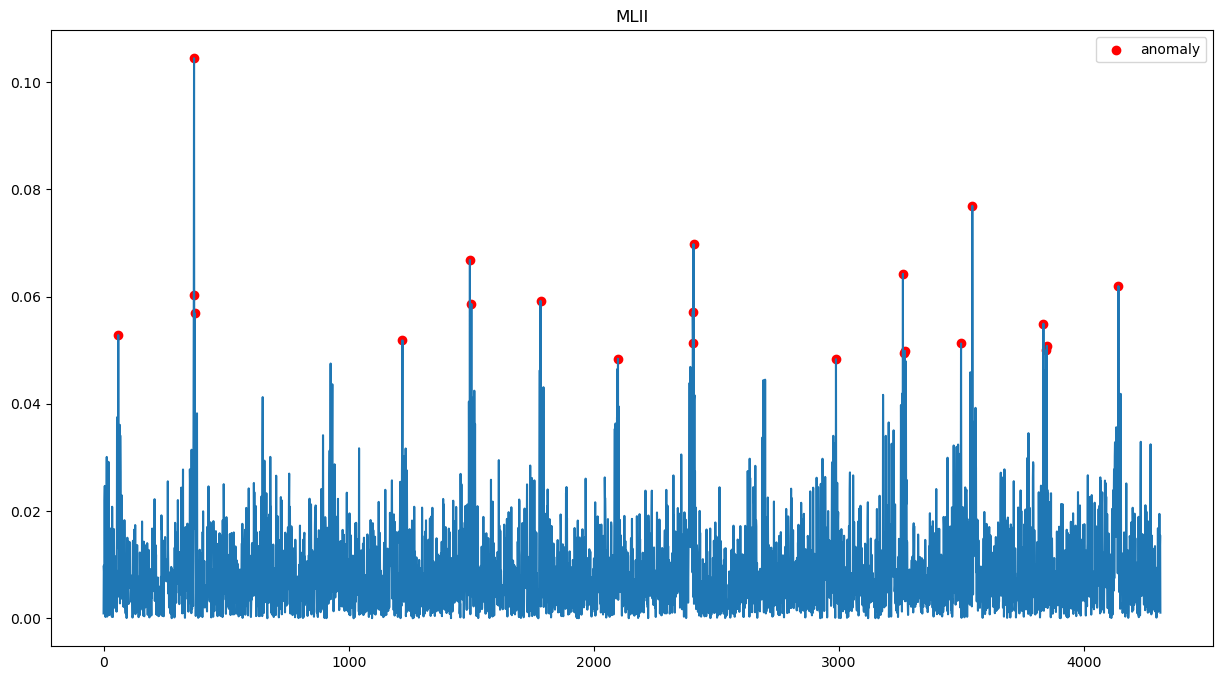

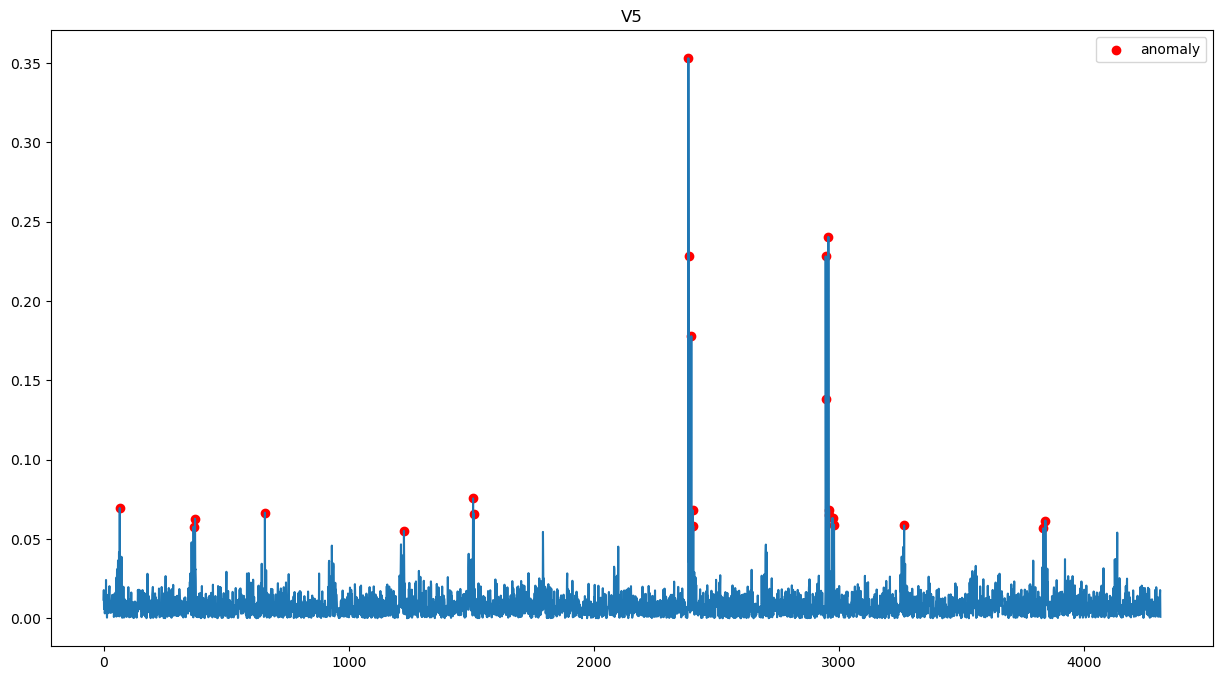

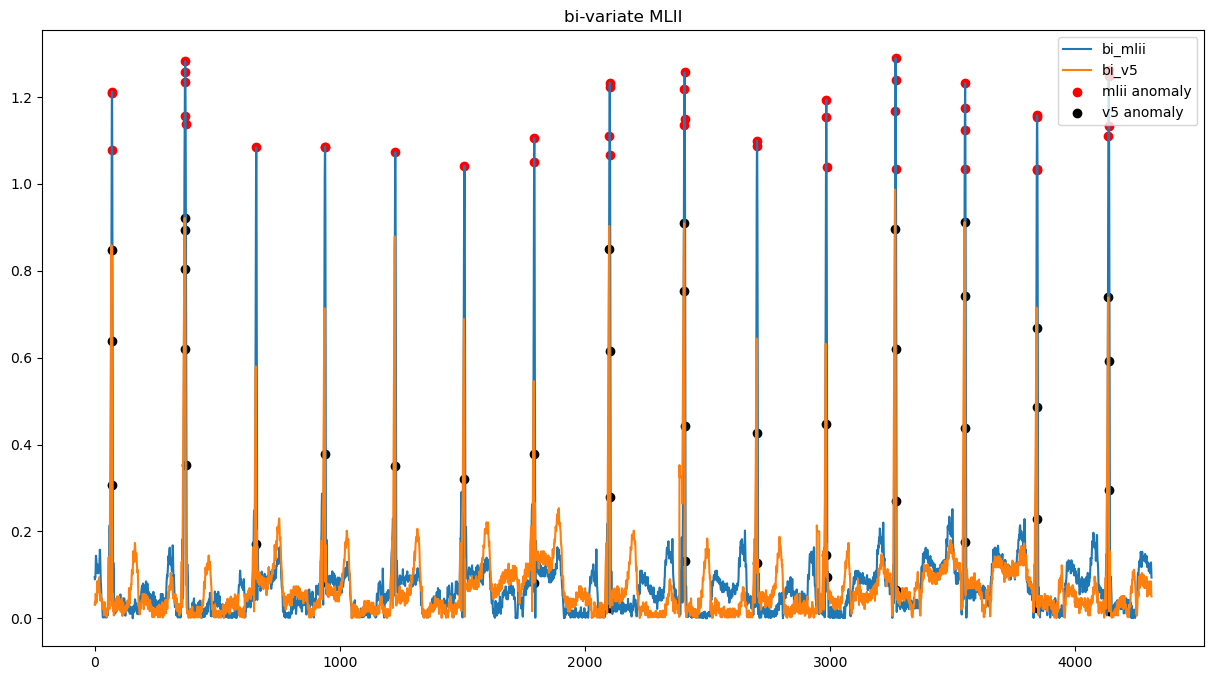

In [125]:

mlii_err = np.abs(mlii_test_out - mlii_pred)
threshold_3_2=np.percentile(mlii_err, 100 - 0.5)
mlii_anomaly = np.where(mlii_err>threshold_3_2)[0]
print(mlii_anomaly, len(mlii_anomaly))

v5_err = np.abs(v5_test_out - v5_pred)
threshold_3_2=np.percentile(v5_err, 100 - 0.5)
v5_anomaly = np.where(v5_err>threshold_3_2)[0]
print(v5_anomaly, len(v5_anomaly))

ecg_err =np.abs(out_test - ecg_pred) 
ecg_err_max = np.amax(ecg_err, axis=1,keepdims=True)
threshold_3_2=np.percentile(ecg_err, 100 - 0.5)
ecg_anomaly = np.where(np.any(ecg_err > threshold_3_2, axis=1))[0]
print(ecg_anomaly, len(ecg_anomaly))

# Visualize anomalies
plt.figure(figsize=(15,8))
# plt.plot(mlii_test_out,label = 'actual output')
# plt.plot(mlii_pred,label = 'predict result')
plt.plot(mlii_err)
plt.scatter(mlii_anomaly,mlii_err[mlii_anomaly],color='red',label ='anomaly')
plt.title("MLII")
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
# plt.plot(v5_test_out,label = 'actual output')
# plt.plot(v5_pred,label = 'predict result')
plt.plot(v5_err)
plt.scatter(v5_anomaly,v5_err[v5_anomaly],color='red',label ='anomaly')
plt.title("V5")
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
# plt.plot(out_test[:,0],label = 'actual output')
# plt.plot(ecg_pred[:,0],label = 'predict result')
plt.plot(ecg_err[:,0],label="bi_mlii")
plt.plot(ecg_err[:,1],label="bi_v5")
plt.scatter(ecg_anomaly,ecg_err[ecg_anomaly,0],color='red',label ='mlii anomaly')
plt.scatter(ecg_anomaly,ecg_err[ecg_anomaly,1],color='black',label ='v5 anomaly')
plt.title("bi-variate MLII")
plt.legend()
plt.show()

# Task 4

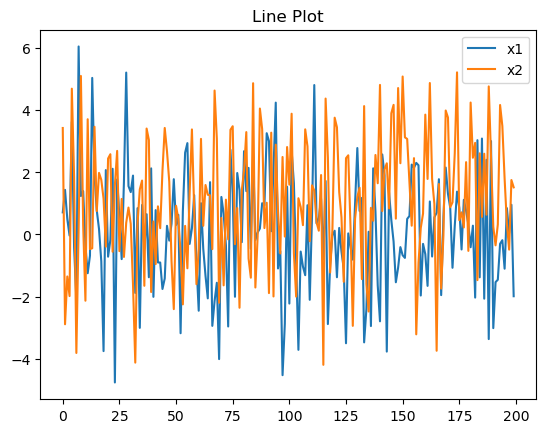

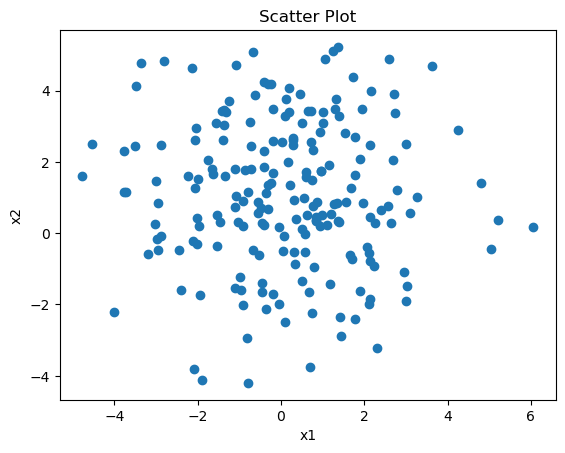

In [40]:
import random
from random import gauss
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from minisom import MiniSom
from scipy.spatial.distance import cdist

np.random.seed(0)
series_x1 = [gauss(0.0, 2.0) for i in range(200)]
series_1=Series(series_x1)
series_x2 = [gauss(1.0, 2.0) for i in range(200)]
series_x2 = Series(series_x2)

# line plot
plt.plot(series_x1,label='x1')
plt.plot(series_x2,label='x2')
plt.title('Line Plot')
plt.legend()
plt.show()

# scatter plot
plt.scatter(series_x1,series_x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot')
plt.show()

data=np.column_stack((series_x1,series_x2))
#print(data)
# cluster


c:\Users\30201\.conda\envs\environ2233\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\30201\.conda\envs\environ2233\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[ 0.45100507 -0.52052274]
 [-0.25785447  2.80463238]]
[1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0
 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1
 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1]
[[ 1.43714085 -2.89260371]
 [ 0.49713357 -1.35274598]
 [-0.0355394  -1.98428447]
 [-2.08875398 -3.8171642 ]
 [ 6.05673106  0.16793062]
 [ 1.3991024   0.30987553]
 [-0.35433784 -2.1336304 ]
 [-0.68243369 -0.46890541]
 [ 5.04427926 -0.44392971]
 [ 0.77933752  0.75430661]
 [ 2.0744692  -0.3933171 ]
 [ 2.11681282 -0.55518696]
 [ 0.57259296 -0.53688309]
 [ 1.71076149 -0.72394153]
 [ 5.215965    0.37674901]
 [ 1.55862766  0.86689953]
 [ 1.36545931  0.34249735]
 [ 1.89727528 -1.62132547]
 [-1.88318532 -4.12827086]
 [ 0.84760586  0.36146007

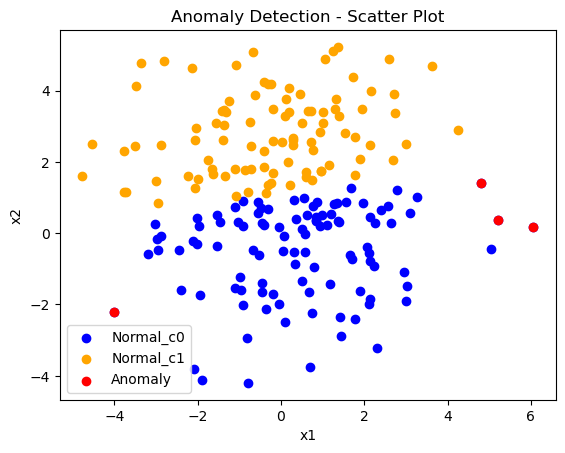

[  7  28  69 111]


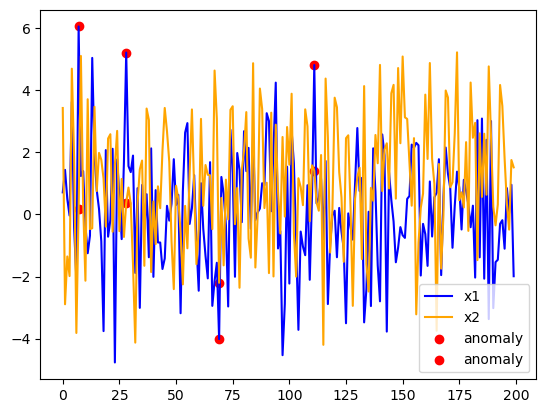

In [53]:
# k-means
num_clusters = 2 
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)
print(kmeans.cluster_centers_)
cluster_result = kmeans.labels_
index_c0 = np.where(cluster_result==0)
index_c1=np.where(cluster_result==1)
# calculate distance between each point and its nearest centroid
distances = kmeans.transform(data)#Euclidean Distance with each centroid
distance = np.min(distances,axis=1)
print(cluster_result)
#Identify anomalies based on the threshold
ano_ratio=0.02
threshold = np.percentile(distance, 98)
anomalies = data[distance > threshold]

print(data[index_c0])
plt.scatter(data[index_c0, 0],data[index_c0, 1], c='blue', label='Normal_c0')
plt.scatter(data[index_c1, 0],data[index_c1, 1], c='orange', label='Normal_c1')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomaly')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Anomaly Detection - Scatter Plot')
plt.legend()
plt.show()

time = np.arange(200)
ano_index = np.where(distance > threshold)[0]
print(ano_index)
plt.plot(time, data[:, 0], color='blue', label='x1')
plt.plot(time, data[:, 1], color='orange', label='x2')
plt.scatter(time[ano_index],data[ano_index,0],color='red',label='anomaly')
plt.scatter(time[ano_index],data[ano_index,1],color='red',label='anomaly')
plt.legend()
plt.show()

 As there are two variables (X1 and X2), it is reasonable to choose a number of clusters equal to 2, as it aligns with the two underlying distributions we have set for X1 and X2.

I used Euclidean distance metric, which measures the straight-line distance between two points in Euclidean space. Some alternative distance metrics include:
Manhattan distance (also known as city block distance or L1 norm): It measures the sum of the absolute differences between the coordinates of two points.
Cosine distance: It measures the cosine of the angle between two vectors and is often used for text or high-dimensional data. For this task, it is not a good choice.
Mahalanobis distance: It accounts for the covariance structure of the data and is suitable for dealing with correlated features.
Minkowski distance: It is a generalization of both the Euclidean and Manhattan distances, where the power parameter determines the type of distance metric.

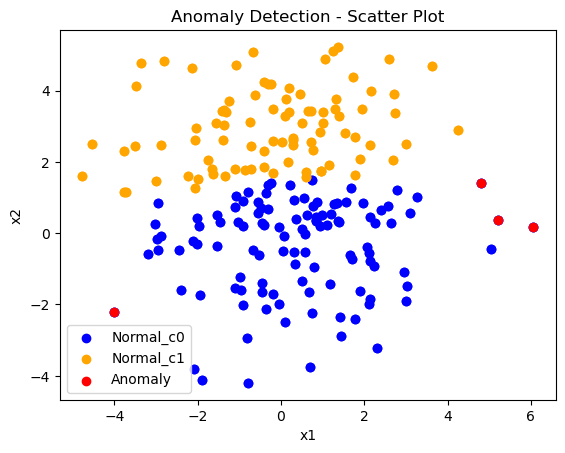

[  7  28  69 111]


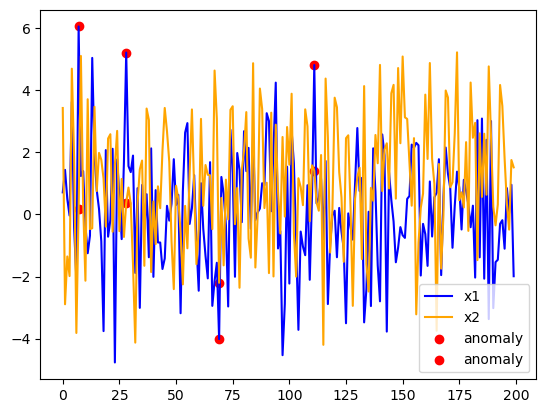

In [57]:
# SOM
som = MiniSom(x=1, y=2, input_len=2, sigma=0.1, learning_rate=0.5)

#randomly initializd and train iteration is 100
som.random_weights_init(data)
som.train_random(data, 100)
#computes the quantized representation of the input data 
# using the trained SOM. It maps each data point to its best matching unit 
# (BMU) in the SOM and returns the quantized representation of the data.
#print(som.quantization(data))
# Euclidean distance between each data point and its quantized representation
distance_som = np.linalg.norm(data - som.quantization(data), axis=1)
threshold_som = np.percentile(distance_som, 98)
anomalies_som = data[distance_som>threshold_som]
result_som = som.get_weights()[0]

index_c0 = np.where(som.quantization(data)==result_som[0])[0]
index_c1 = np.where(som.quantization(data)==result_som[1])[0]

plt.scatter(data[index_c0, 0],data[index_c0, 1], c='blue', label='Normal_c0')
plt.scatter(data[index_c1, 0],data[index_c1, 1], c='orange', label='Normal_c1')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomaly')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Anomaly Detection - Scatter Plot')
plt.legend()
plt.show()

time = np.arange(200)
ano_index = np.where(distance > threshold)[0]
print(ano_index)
plt.plot(time, data[:, 0], color='blue', label='x1')
plt.plot(time, data[:, 1], color='orange', label='x2')
plt.scatter(time[ano_index],data[ano_index,0],color='red',label='anomaly')
plt.scatter(time[ano_index],data[ano_index,1],color='red',label='anomaly')
plt.legend()
plt.show()

The results show that these 2 methods achieve the different clustering results, because they randomly initialize the centroid and even different time to execute the same cluster with the same dataset will lead to a different result.
but the anomalies found in the 2 methods are the same.
 Because 
1. Both K-means and SOM operate on the same input data, which is typically a set of features or variables describing each data point. As long as the input data and its representation are consistent across the methods, they have the potential to identify similar patterns and anomalies.

2. Both K-means and SOM rely on same distance metrics (Euclidean) to measure the similarity between data points. 

3. They both attempt to partition the data into clusters, with each cluster representing a distinct pattern or behavior. Anomalies, by definition, deviate from the normal patterns, and both methods can identify such deviations as points that do not fit well into any cluster.